# ***Group_06***

#### Import libraries

In [549]:
import re
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import plotly.express as px
from matplotlib.ticker import MaxNLocator

#### Set input directory path

In [550]:
directory = r"C:/Users/Source/Downloads/Python Project/data/raw/data_berka/"

####  Import dataset

In [551]:
district 	= pd.read_csv(directory + 'district.asc', sep=';') 
account 	= pd.read_csv(directory + 'account.asc', sep=';') 
client 		= pd.read_csv(directory + 'client.asc', sep=';') 
card 		= pd.read_csv(directory + 'card.asc', sep=';') 
disp 		= pd.read_csv(directory + 'disp.asc', sep=';') 
loan 		= pd.read_csv(directory + 'loan.asc', sep=';')
order 		= pd.read_csv(directory + 'order.asc', sep=';')
trans 		= pd.read_csv(directory + 'trans.asc', sep=';', low_memory=False)

## Data preparation

###  ***Account dataset***

In [552]:
account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [553]:
# Check for consistency in datatypes
account.dtypes

account_id      int64
district_id     int64
frequency      object
date            int64
dtype: object

In [554]:
# check for missing values 
missing_values_account = account.isna().sum()
missing_values_account

account_id     0
district_id    0
frequency      0
date           0
dtype: int64

In [555]:
# Check for duplicates in the "account_id" column 
duplicates_account_id = account.duplicated(subset=['account_id']).sum()
duplicates_account_id

0

In [556]:
# Check for consistency in the table
account.describe()

,account_id,district_id,date
count,4500.000000,4500.000000,4500.000000
mean,2786.067556,37.310444,951654.608667
std,2313.811984,25.177217,14842.188377
min,1.000000,1.000000,930101.000000
25%,1182.750000,13.000000,931227.000000
50%,2368.000000,38.000000,960102.000000
75%,3552.250000,60.000000,961101.000000
max,11382.000000,77.000000,971229.000000


In [557]:
# Convert the 'date' column to string to create the IVs in the section below
account['date'] = account['date'].astype(str)

In [558]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   object
dtypes: int64(2), object(2)
memory usage: 140.8+ KB


### ***Client dataset***

In [559]:
client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [560]:
client.dtypes

client_id       int64
birth_number    int64
district_id     int64
dtype: object

In [561]:
# check for missing values
missing_values_client = client.isna().sum()
missing_values_client

client_id       0
birth_number    0
district_id     0
dtype: int64

In [562]:
# Check for duplicates in the "client_id" column 
duplicates_client_id = client.duplicated(subset=['client_id']).sum()
duplicates_client_id

0

In [563]:
client.describe()

,client_id,birth_number,district_id
count,5369.000000,5369.000000,5369.000000
mean,3359.011920,535114.970013,37.310114
std,2832.911984,172895.618429,25.043690
min,1.000000,110820.000000,1.000000
25%,1418.000000,406009.000000,14.000000
50%,2839.000000,540829.000000,38.000000
75%,4257.000000,681013.000000,60.000000
max,13998.000000,875927.000000,77.000000


In [564]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


###  ***Disposition dataset***

In [565]:
disp.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [566]:
# Check for consistency in datatypes
disp.dtypes

disp_id        int64
client_id      int64
account_id     int64
type          object
dtype: object

In [567]:
# check for missing values
missing_values_disp = disp.isna().sum()
missing_values_disp

disp_id       0
client_id     0
account_id    0
type          0
dtype: int64

In [568]:
# Check for duplicates in the "disp_id" column 
duplicates_disp_id = disp.duplicated(subset=['disp_id']).sum()
duplicates_disp_id

0

In [569]:
#Check for duplicates in "client_id"
disp.duplicated(subset=['client_id']).sum()

0

In [570]:
#Rename 'type' column 
disp = disp.rename(columns={'type':'account_type'})


In [571]:
disp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   disp_id       5369 non-null   int64 
 1   client_id     5369 non-null   int64 
 2   account_id    5369 non-null   int64 
 3   account_type  5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


###  ***Order dataset***

In [572]:
order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [573]:
order.dtypes

order_id        int64
account_id      int64
bank_to        object
account_to      int64
amount        float64
k_symbol       object
dtype: object

In [574]:
# check for missing values
missing_values_order = order.isna().sum()
missing_values_order

order_id      0
account_id    0
bank_to       0
account_to    0
amount        0
k_symbol      0
dtype: int64

In [575]:
#Check for duplicates in order_id
order.duplicated(subset=['order_id']).sum()

0

In [576]:
#Cech for the unique number of clients 

order['account_id'].nunique()

3758

In [577]:
# Replace values with 'No_Payment' where the 'k_symbol' contains whitespace
order.loc[order['k_symbol'].str.contains(r'\s', na=False, regex=True), 'k_symbol'] = 'NOT_AVAILABLE'

### ***Transaction dataset***

In [578]:
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [579]:
trans.dtypes

trans_id        int64
account_id      int64
date            int64
type           object
operation      object
amount        float64
balance       float64
k_symbol       object
bank           object
account       float64
dtype: object

In [580]:
# Check for missing values 
missing_values_trans = trans.isna().sum()


In [581]:
# Replace missing values in table "trans"
trans['k_symbol'] = np.where(trans['k_symbol'].isna(), 'Not_available', trans['k_symbol'])
trans['bank'] = np.where(trans['bank'].isna(), 'Not_available', trans['bank'])
trans['account'] = np.where(trans['account'].isna(), 'Not_available', trans['account'])

In [582]:
# Rename the columns for better clarity  
trans.rename(columns={
    'amount': 'trans_amount',
    'balance': 'balance_after_trans',
    'bank': 'trans_bank_partner',
    'account': 'trans_account_of_partner',
    'type' : 'trans_type',
    'operation' : 'trans_operation'
}, inplace=True)

In [583]:
# Imputing missing values in "operation" column 
trans['trans_operation']=trans['trans_operation'].fillna(trans['trans_operation'].mode()[0])

In [584]:
# Convert the 'date' column to string
trans['date'] = trans['date'].astype(str)

# Extract the year, month, and day as separate columns
trans['trans_year'] = trans['date'].str[:2].astype(int) + 1900
trans['trans_month'] = trans['date'].str[2:4]
trans['trans_day'] = trans['date'].str[4:]

# Combine the day, month, and year to create a 'DD-MM-YYYY' format
trans['trans_date'] = trans['trans_day'] + '-' + trans['trans_month'] + '-' + trans['trans_year'].astype(str)

#convert d'trans_date' column to date type
trans['trans_date'] = pd.to_datetime(trans['trans_date'], format='%d-%m-%Y')



In [585]:
trans.dtypes

trans_id                             int64
account_id                           int64
date                                object
trans_type                          object
trans_operation                     object
trans_amount                       float64
balance_after_trans                float64
k_symbol                            object
trans_bank_partner                  object
trans_account_of_partner            object
trans_year                           int32
trans_month                         object
trans_day                           object
trans_date                  datetime64[ns]
dtype: object

### ***Loan dataset***

In [586]:
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [587]:
loan.dtypes

loan_id         int64
account_id      int64
date            int64
amount          int64
duration        int64
payments      float64
status         object
dtype: object

In [588]:
# Check for missing values
missing_values_loan = loan.isna().sum()
missing_values_loan

loan_id       0
account_id    0
date          0
amount        0
duration      0
payments      0
status        0
dtype: int64

In [589]:
#cheking for duplicate values in "loan_id" column
duplicates_loan_id = loan.duplicated(subset=['loan_id']).sum()
duplicates_loan_id

0

In [590]:
#cheking for duplicate values in "loan_id" column
duplicates_account_id = loan.duplicated(subset=['account_id']).sum()
duplicates_account_id

0

In [591]:
# Create new formated date column and set date datatype
loan['loan_granted_date'] = pd.to_datetime(loan['date'], format='%y%m%d')

In [592]:
# Rename the columns
loan = loan.rename(columns={
                                          'payments':'loan_payments',
                                          'amount':'loan_total_amount',
                                          'duration':'loan_duration',
                                          'payments':'loan_monthly_payments',
                                          'status':'loan_status'})

# drop the columns
#loan =loan.drop(columns=['loan_id', 'date'])

#filter the loan table to inlcude  loan granted on 1996 or before
loan_iv = loan[loan['loan_granted_date'].apply(lambda x: x.year) <= 1996]
loan_iv

,loan_id,account_id,date,loan_total_amount,loan_duration,loan_monthly_payments,loan_status,loan_granted_date
0,5314,1787,930705,96396,12,8033.0,B,1993-07-05
1,5316,1801,930711,165960,36,4610.0,A,1993-07-11
2,6863,9188,930728,127080,60,2118.0,A,1993-07-28
3,5325,1843,930803,105804,36,2939.0,A,1993-08-03
4,7240,11013,930906,274740,60,4579.0,A,1993-09-06
...,...,...,...,...,...,...,...,...
323,6818,9030,961212,155616,48,3242.0,C,1996-12-12
324,5625,3189,961215,222180,60,3703.0,D,1996-12-15
325,6805,8972,961221,45024,48,938.0,C,1996-12-21
326,7233,10963,961225,115812,36,3217.0,C,1996-12-25


###  ***Credit card dataset***

In [593]:
card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [594]:
#Check for missing values
card.isna().sum()

card_id    0
disp_id    0
type       0
issued     0
dtype: int64

In [595]:
card.dtypes

card_id     int64
disp_id     int64
type       object
issued     object
dtype: object

In [596]:
#Check for duplicates in card_id
card.duplicated(subset=['card_id']).sum()

0

In [597]:
#Check for duplicates in disp_id
card.duplicated(subset=['disp_id']).sum()

0

In [598]:
# Change date column format
card['issued'] = pd.to_datetime(card['issued'])

# Change date column to date type
card['issued'] = card['issued'].dt.date

# Create issue_year column
card['card_issued_year'] = card['issued'].astype(str).str[:4].astype(int)

# Create issue_month column
card['card_issued_month'] = card['issued'].astype(str).str[5:7].astype(int)

# Create issue_day column
card['card_issued_day'] = card['issued'].astype(str).str[8:].astype(int)

# Rename 'type' and 'issued' columns  
card = card.rename(columns={'type':'card_type', 'issued':'card_issued_date'})
card

C:\Users\Source\AppData\Local\Temp\ipykernel_31124\2395563913.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,card_id,disp_id,card_type,card_issued_date,card_issued_year,card_issued_month,card_issued_day
0,1005,9285,classic,1993-11-07,1993,11,7
1,104,588,classic,1994-01-19,1994,1,19
2,747,4915,classic,1994-02-05,1994,2,5
3,70,439,classic,1994-02-08,1994,2,8
4,577,3687,classic,1994-02-15,1994,2,15
...,...,...,...,...,...,...,...
887,125,694,gold,1998-12-26,1998,12,26
888,674,4360,classic,1998-12-28,1998,12,28
889,322,2063,classic,1998-12-28,1998,12,28
890,685,4467,classic,1998-12-29,1998,12,29


In [599]:
card['card_issued_year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998])

In [600]:
#create a copy of card table to include only cards issued before or in 1996
card_iv = card[card['card_issued_year'] <=1996]
card_iv

,card_id,disp_id,card_type,card_issued_date,card_issued_year,card_issued_month,card_issued_day
0,1005,9285,classic,1993-11-07,1993,11,7
1,104,588,classic,1994-01-19,1994,1,19
2,747,4915,classic,1994-02-05,1994,2,5
3,70,439,classic,1994-02-08,1994,2,8
4,577,3687,classic,1994-02-15,1994,2,15
...,...,...,...,...,...,...,...
196,162,967,junior,1996-12-23,1996,12,23
197,594,3794,junior,1996-12-27,1996,12,27
198,609,3893,classic,1996-12-29,1996,12,29
199,1111,11288,classic,1996-12-31,1996,12,31


In [601]:
card_iv.dtypes

card_id               int64
disp_id               int64
card_type            object
card_issued_date     object
card_issued_year      int32
card_issued_month     int32
card_issued_day       int32
dtype: object

### ***Demographic dataset***

In [602]:
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [603]:
district.dtypes

A1       int64
A2      object
A3      object
A4       int64
A5       int64
A6       int64
A7       int64
A8       int64
A9       int64
A10    float64
A11      int64
A12     object
A13    float64
A14      int64
A15     object
A16      int64
dtype: object

In [604]:
#Check for missing values
district.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [605]:
#Check for duplicates in district_id
district.duplicated(subset=['A1']).sum()

0

In [606]:
# Convert A12 and A15 from 'object' to 'float' and replace non-numeric values with 0.0
district['A12'] = pd.to_numeric(district['A12'], errors='coerce').fillna(0.0)
district['A15'] = pd.to_numeric(district['A15'], errors='coerce').fillna(0).astype('int64')

In [607]:
# Dictionary mapping old column names to new column names
districtColumnNames = {"A1" : "district_id",
                "A2" : "district_name",
                "A3" : "region_name",
                "A4" : "nbr_inhab",
                "A5" : "nbr_muni_inhab_499",
                "A6" : "nbr_muni_inhab_500_1999",
                "A7" : "nbr_muni_inhab_2000_9999",
                "A8" : "nbr_muni_inhab_10000",
                "A9" : "nbr_cities",
                "A10" : "ratio_urban_inhab",
                "A11" : "avg_salary",
                "A12" : "unemp_rate_95",
                "A13" : "unemp_rate_96",
                "A14" : "nbr_entrepreneur_inhab",
                "A15" : "nbr_crimes_95",
                "A16" : "nbr_crimes_96"}

In [608]:
# Rename columns using the dictionary
district.rename(columns=districtColumnNames, inplace=True)

In [609]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   district_id               77 non-null     int64  
 1   district_name             77 non-null     object 
 2   region_name               77 non-null     object 
 3   nbr_inhab                 77 non-null     int64  
 4   nbr_muni_inhab_499        77 non-null     int64  
 5   nbr_muni_inhab_500_1999   77 non-null     int64  
 6   nbr_muni_inhab_2000_9999  77 non-null     int64  
 7   nbr_muni_inhab_10000      77 non-null     int64  
 8   nbr_cities                77 non-null     int64  
 9   ratio_urban_inhab         77 non-null     float64
 10  avg_salary                77 non-null     int64  
 11  unemp_rate_95             77 non-null     float64
 12  unemp_rate_96             77 non-null     float64
 13  nbr_entrepreneur_inhab    77 non-null     int64  
 14  nbr_crimes_9

## Independent variables

## Account Dataset

In [610]:

# Extract the year, month, and day as separate columns
account['account_year'] = account['date'].str[:2].astype(int) + 1900
account['account_month'] = account['date'].str[2:4]
account['account_day'] = account['date'].str[4:]

# Combine the day, month, and year to create a 'DD-MM-YYYY' format
account['account_creation_date'] = account['account_day'] + '-' + account['account_month'] + '-' + account['account_year'].astype(str)

# Change the "account_creation_date" into date format
account['account_creation_date'] = pd.to_datetime(account['account_creation_date'], format='%d-%m-%Y')

# Add length of relationship "LOR" column 
account['account_LOR'] = 1996 - account['account_year']

# Change the "district_id" to "account_district_id" for a personal preference
#account.rename(columns={'district_id': 'account_district_id'}, inplace=True)

# Convert 'account_district_id' from float64 to int64
account['district_id'] = account['district_id'].astype('int64')

# Change the "frequency" column name to "statement_frequenecy"
account = account.rename(columns={'frequency': 'account_freq_statement'})


# Filter the accounts to keep only those who have ben created on 1996 or before
account_iv = account[account['account_year'] < 1996]

account_iv

,account_id,district_id,account_freq_statement,date,account_year,account_month,account_day,account_creation_date,account_LOR
0,576,55,POPLATEK MESICNE,930101,1993,01,01,1993-01-01,3
1,3818,74,POPLATEK MESICNE,930101,1993,01,01,1993-01-01,3
2,704,55,POPLATEK MESICNE,930101,1993,01,01,1993-01-01,3
3,2378,16,POPLATEK MESICNE,930101,1993,01,01,1993-01-01,3
4,2632,24,POPLATEK MESICNE,930102,1993,01,02,1993-01-02,3
...,...,...,...,...,...,...,...,...,...
2234,4462,73,POPLATEK TYDNE,951227,1995,12,27,1995-12-27,1
2235,3814,74,POPLATEK MESICNE,951227,1995,12,27,1995-12-27,1
2236,2780,63,POPLATEK MESICNE,951229,1995,12,29,1995-12-29,1
2237,3273,74,POPLATEK MESICNE,951229,1995,12,29,1995-12-29,1


## Client Dataset

In [611]:
# Transform the birth day into year

client_iv = client.copy()

client_iv['client_birth_year'] = '19' + client_iv['birth_number'].astype(str).str[:2]
client_iv['client_birth_year'] = client_iv['client_birth_year'].astype(int)

# Transform the birth day to day
client_iv['client_birth_day'] = client_iv['birth_number'].astype(str).str[-2:].astype(int)

# Extract the birth month
client_iv['client_birth_month'] = client_iv['birth_number'].astype(str).str[2:4].astype(int)

# Extract and correct the gender
client_iv['client_gender'] = 'M'
client_iv.loc[client_iv['client_birth_month'] > 50, 'client_gender'] = 'F'

# Correct the birth month
client_iv.loc[client_iv['client_birth_month'] > 50, 'client_birth_month'] = client_iv.loc[client_iv['client_birth_month'] > 50, 'client_birth_month'] - 50

# calculate  Age
client_iv['client_age'] = 1996 - client_iv['client_birth_year']

# create Age group
client_iv['client_age_group'] = client_iv['client_age'] // 10 * 10

client_iv

,client_id,birth_number,district_id,client_birth_year,client_birth_day,client_birth_month,client_gender,client_age,client_age_group
0,1,706213,18,1970,13,12,F,26,20
1,2,450204,1,1945,4,2,M,51,50
2,3,406009,1,1940,9,10,F,56,50
3,4,561201,5,1956,1,12,M,40,40
4,5,605703,5,1960,3,7,F,36,30
...,...,...,...,...,...,...,...,...,...
5364,13955,456030,1,1945,30,10,F,51,50
5365,13956,430406,1,1943,6,4,M,53,50
5366,13968,680413,61,1968,13,4,M,28,20
5367,13971,626019,67,1962,19,10,F,34,30


## Order dataset

In [612]:

# Pivot the order table  based on 'k_symbol' and 'account_id'
pivot_k_symbol_order = order.pivot_table(index='account_id', columns='k_symbol', values='amount', aggfunc='sum', fill_value=0)

# Add 'account_id' as a column by resetting the index
pivot_k_symbol_order = pivot_k_symbol_order.reset_index()

# Add a new column 'k_symbol_order_SUM' for the total sum of amounts for each 'account_id' 
pivot_k_symbol_order['k_symbol_SUM'] = pivot_k_symbol_order.iloc[:, 1:].sum(axis=1)

# Add prefix 'order_' to every column
pivot_k_symbol_order = pivot_k_symbol_order.add_prefix('order_')

#rename 'order_account_id' to 'account_id'
pivot_k_symbol_order.rename(columns={'order_account_id': 'account_id'}, inplace=True)


pivot_k_symbol_order

k_symbol,account_id,order_LEASING,order_NOT_AVAILABLE,order_POJISTNE,order_SIPO,order_UVER,order_k_symbol_SUM
0,1,0.0,0,0,2452,0.0,2452.0
1,2,0.0,0,0,7266,3372.7,10638.7
2,3,0.0,327,3539,1135,0.0,5001.0
3,4,0.0,0,0,3363,0.0,3363.0
4,5,0.0,0,0,2668,0.0,2668.0
...,...,...,...,...,...,...,...
3753,11328,0.0,0,0,0,4674.0,4674.0
3754,11333,3286.7,0,0,0,0.0,3286.7
3755,11349,0.0,0,0,10886,6998.0,17884.0
3756,11359,0.0,254,0,4518,4502.3,9274.3


In [613]:
# Pivot the DataFrame based on 'bank_to' and 'account_id'
pivot_bank_to_order = order.pivot_table(index='account_id', columns='bank_to', values='amount', aggfunc='sum', fill_value=0)

# Add 'account_id' as a column by resetting the index
pivot_bank_to_order = pivot_bank_to_order.reset_index()

# Add prefix 'order_' to every column
pivot_bank_to_order = pivot_bank_to_order.add_prefix('order_')

# Rename 'bank_to' columns
pivot_bank_to_order = pivot_bank_to_order.rename(columns={'bank_to': 'order_bank_to'})

#Rename the 'order_account_id' to account_id for later merge
pivot_bank_to_order = pivot_bank_to_order.rename(columns={'order_account_id': 'account_id'})

pivot_bank_to_order

bank_to,account_id,order_AB,order_CD,order_EF,order_GH,order_IJ,order_KL,order_MN,order_OP,order_QR,order_ST,order_UV,order_WX,order_YZ
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2452.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7266.0,3372.7,0.0,0.0,0.0
2,3,3539.0,327.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1135.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3363.0,0.0,0.0
4,5,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,11328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4674.0
3754,11333,0.0,0.0,0.0,0.0,3286.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3755,11349,0.0,0.0,0.0,10886.0,0.0,6998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3756,11359,254.0,0.0,4502.3,0.0,0.0,0.0,0.0,4518.0,0.0,0.0,0.0,0.0,0.0


### Transaction dataset

In [614]:
#selecting transactions happening in 1996 
#this step is unrelated to the previous step were "transCopy" was created 
trans_96 = trans[trans['trans_year'] == 1996]
trans_96

,trans_id,account_id,date,trans_type,trans_operation,trans_amount,balance_after_trans,k_symbol,trans_bank_partner,trans_account_of_partner,trans_year,trans_month,trans_day,trans_date
252855,732811,2504,960101,VYDAJ,VYBER KARTOU,900.0,38124.4,Not_available,Not_available,0.0,1996,01,01,1996-01-01
252856,800209,2729,960101,VYDAJ,VYBER,1920.0,34202.7,Not_available,Not_available,Not_available,1996,01,01,1996-01-01
252857,803553,2738,960101,VYDAJ,VYBER,6500.0,25685.2,Not_available,Not_available,Not_available,1996,01,01,1996-01-01
252858,1042686,3566,960101,VYDAJ,VYBER,1000.0,25919.7,Not_available,Not_available,Not_available,1996,01,01,1996-01-01
252859,1042689,3566,960101,VYDAJ,VYBER,500.0,25419.7,Not_available,Not_available,Not_available,1996,01,01,1996-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449629,515914,1763,961231,VYDAJ,VYBER,14.6,67769.5,SLUZBY,Not_available,Not_available,1996,12,31,1996-12-31
449630,516262,1765,961231,VYDAJ,VYBER,14.6,19708.1,SLUZBY,Not_available,Not_available,1996,12,31,1996-12-31
449631,520019,1775,961231,VYDAJ,VYBER,14.6,15944.5,SLUZBY,Not_available,Not_available,1996,12,31,1996-12-31
449632,517894,1769,961231,VYDAJ,VYBER,14.6,34679.4,SLUZBY,Not_available,Not_available,1996,12,31,1996-12-31


In [615]:
#aggregarting credit transaction per account id 
trans96_agg_credit = trans_96[trans_96['trans_type'].isin(['PRIJEM'])].groupby('account_id')['trans_amount'].agg('sum')

#aggregation of average credit transaction per account id 
trans96_avg_credit = trans_96[trans_96['trans_type'].isin(['PRIJEM'])].groupby('account_id')['trans_amount'].agg('mean')

#aggregating withdrawals transactiuon per account id 
tras96_agg_withdrawal = trans_96[trans_96['trans_type'].isin(['VYDAJ'])].groupby('account_id')['trans_amount'].agg('sum')

#aggregation of average withdrawals transactiuon per account id 
trans96_avg_withdrawal =  trans_96[trans_96['trans_type'].isin(['VYDAJ'])].groupby('account_id')['trans_amount'].agg('mean')

#aggregation of total spend per account id 
trans96_agg_total_spend = trans96_agg_credit - tras96_agg_withdrawal

#create a flag variable of total spend
trans96_total_spend_flag = pd.Series(np.where(trans96_agg_total_spend >= 0 , '1','0') , index = trans96_agg_total_spend.index , name= 'flag_spend')

#calculating the eralisest balance per account id 
earliest_balance_trans96 = trans_96.groupby('account_id')['trans_date'].idxmin()
earliest_balance_trans96 = pd.Series(trans_96.loc[earliest_balance_trans96,'balance_after_trans'].values,index=earliest_balance_trans96.index , name = 'first_balance96')


#calculating the latest balance per account id in the year 1996
latest_balance_trans96 = trans_96.groupby('account_id')['trans_date'].idxmax()
latest_balance_trans96 = pd.Series(trans_96.loc[latest_balance_trans96,'balance_after_trans'].values,index=latest_balance_trans96.index , name = 'latest_balance96')

# calculating the frequency of transaction
trans96_frequency = trans_96.groupby('account_id').size()


In [616]:
# Convert Series to DataFrames for easy merging
df_trans96_agg_credit = trans96_agg_credit.reset_index(name='trans_total_credit')
df_trans96_avg_credit = trans96_avg_credit.reset_index(name='trans_avg_credit')
df_tras96_agg_withdrawal = tras96_agg_withdrawal.reset_index(name='trans_total_withdrawal')
df_trans96_avg_withdrawal = trans96_avg_withdrawal.reset_index(name='trans_avg_withdrawal')
df_trans96_agg_total_spend = trans96_agg_total_spend.reset_index(name='trans_total_spend')
df_trans96_total_spend_flag = trans96_total_spend_flag.reset_index()
df_earliest_balance_trans96 = earliest_balance_trans96.reset_index(name='trans_first_balance96')
df_latest_balance_trans96 = latest_balance_trans96.reset_index(name='trans_latest_balance96')
df_trans96_frequency = trans96_frequency.reset_index(name='trans_frequency_96')

unique_accounts = trans_96[['account_id']].drop_duplicates()

# Merge the aggregated data onto the unique account IDs
trans_iv = unique_accounts.merge(df_trans96_agg_credit, on='account_id', how='left')
trans_iv = trans_iv.merge(df_trans96_avg_credit, on='account_id', how='left')
trans_iv = trans_iv.merge(df_tras96_agg_withdrawal, on='account_id', how='left')
trans_iv = trans_iv.merge(df_trans96_avg_withdrawal, on='account_id', how='left')
trans_iv = trans_iv.merge(df_trans96_agg_total_spend, on='account_id', how='left')
trans_iv = trans_iv.merge(df_trans96_total_spend_flag, on='account_id', how='left')
trans_iv = trans_iv.merge(df_earliest_balance_trans96, on='account_id', how='left')
trans_iv = trans_iv.merge(df_latest_balance_trans96, on='account_id', how='left')
trans_iv = trans_iv.merge(df_trans96_frequency, on='account_id', how='left')

trans_iv


,account_id,trans_total_credit,trans_avg_credit,trans_total_withdrawal,trans_avg_withdrawal,trans_total_spend,flag_spend,trans_first_balance96,trans_latest_balance96,trans_frequency_96
0,2504,305684.3,12736.845833,315431.2,6437.371429,-9746.9,0,38124.4,29277.5,73
1,2729,197049.3,6568.310000,181411.2,3943.721739,15638.1,1,34202.7,51760.7,76
2,2738,187681.6,7820.066667,193043.2,3113.600000,-5361.6,0,25685.2,26823.3,86
3,3566,71725.1,2758.657692,82915.2,1594.523077,-11190.1,0,25919.7,15729.4,78
4,2365,62469.2,2602.883333,56177.2,1478.347368,6292.0,1,20193.5,28165.6,62
...,...,...,...,...,...,...,...,...,...,...
3597,528,300.0,300.000000,NaN,NaN,NaN,0,300.0,300.0,1
3598,3190,1000.0,1000.000000,NaN,NaN,NaN,0,1000.0,1000.0,1
3599,1988,300.0,300.000000,NaN,NaN,NaN,0,300.0,300.0,1
3600,1390,400.0,400.000000,NaN,NaN,NaN,0,400.0,400.0,1


## Dependent variables

#### Target variable 1 : Client had granted loan in the dependent variables time window (i.e. 1997) 

In [617]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   loan_id                682 non-null    int64         
 1   account_id             682 non-null    int64         
 2   date                   682 non-null    int64         
 3   loan_total_amount      682 non-null    int64         
 4   loan_duration          682 non-null    int64         
 5   loan_monthly_payments  682 non-null    float64       
 6   loan_status            682 non-null    object        
 7   loan_granted_date      682 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 42.8+ KB


In [618]:
#create a copy of loan to extract account id and loand_granted_date
loan_DV = loan[['account_id', 'loan_granted_date']]
# Create a new column 'loan_granted_97' and set to 1 if 'loan_granted_year' is 1997, else set to 0
loan_DV.loc[:, 'loan_granted_97'] = (loan_DV['loan_granted_date'].dt.year == 1997).astype(int)
#loan_DV = loan_DV.drop(columns = ['loan_granted_date'])
loan_DV

C:\Users\Source\AppData\Local\Temp\ipykernel_31124\1319828028.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,account_id,loan_granted_date,loan_granted_97
0,1787,1993-07-05,0
1,1801,1993-07-11,0
2,9188,1993-07-28,0
3,1843,1993-08-03,0
4,11013,1993-09-06,0
...,...,...,...
677,105,1998-12-05,0
678,1284,1998-12-05,0
679,6922,1998-12-06,0
680,1928,1998-12-06,0


In [619]:
#Checking count of loan granted
loan_DV[loan_DV['loan_granted_97'] == 1].count()

account_id           196
loan_granted_date    196
loan_granted_97      196
dtype: int64

#### Target variable 2 : Client had a credit card issued in the dependent variables time window (i.e. 1997) 

In [620]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   card_id            892 non-null    int64 
 1   disp_id            892 non-null    int64 
 2   card_type          892 non-null    object
 3   card_issued_date   892 non-null    object
 4   card_issued_year   892 non-null    int32 
 5   card_issued_month  892 non-null    int32 
 6   card_issued_day    892 non-null    int32 
dtypes: int32(3), int64(2), object(2)
memory usage: 38.5+ KB


In [621]:
#create a copy of card table where the year issued is 1997
card_DV = card[card['card_issued_year'] ==1997]
card_DV

,card_id,disp_id,card_type,card_issued_date,card_issued_year,card_issued_month,card_issued_day
201,1118,11393,classic,1997-01-02,1997,1,2
202,175,1040,classic,1997-01-03,1997,1,3
203,565,3601,gold,1997-01-06,1997,1,6
204,714,4638,classic,1997-01-09,1997,1,9
205,137,786,junior,1997-01-10,1997,1,10
...,...,...,...,...,...,...,...
438,566,3606,classic,1997-12-25,1997,12,25
439,575,3667,gold,1997-12-25,1997,12,25
440,154,887,classic,1997-12-28,1997,12,28
441,130,722,classic,1997-12-29,1997,12,29


In [622]:
#merging the Card_DV with the disp table to check which account types has been issued a card in the year 1997
merged_card_DV_Disp = card.merge(disp, on='disp_id', how='left')
merged_card_DV_Disp

,card_id,disp_id,card_type,card_issued_date,card_issued_year,card_issued_month,card_issued_day,client_id,account_id,account_type
0,1005,9285,classic,1993-11-07,1993,11,7,9593,7753,OWNER
1,104,588,classic,1994-01-19,1994,1,19,588,489,OWNER
2,747,4915,classic,1994-02-05,1994,2,5,4915,4078,OWNER
3,70,439,classic,1994-02-08,1994,2,8,439,361,OWNER
4,577,3687,classic,1994-02-15,1994,2,15,3687,3050,OWNER
...,...,...,...,...,...,...,...,...,...,...
887,125,694,gold,1998-12-26,1998,12,26,694,577,OWNER
888,674,4360,classic,1998-12-28,1998,12,28,4360,3614,OWNER
889,322,2063,classic,1998-12-28,1998,12,28,2063,1698,OWNER
890,685,4467,classic,1998-12-29,1998,12,29,4467,3705,OWNER


In [623]:
#Check unique vales of account type , it informs that only OWNERS have been issued card in the year of 1997
merged_card_DV_Disp['account_type'].unique()

array(['OWNER'], dtype=object)

In [624]:
#Adding the column 'credit_card_issued97' 
card_DV.loc[:, 'credit_card_issued97'] = (card['card_issued_year'] == 1997).astype(int)
card_DV

C:\Users\Source\AppData\Local\Temp\ipykernel_31124\4101951878.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,card_id,disp_id,card_type,card_issued_date,card_issued_year,card_issued_month,card_issued_day,credit_card_issued97
201,1118,11393,classic,1997-01-02,1997,1,2,1
202,175,1040,classic,1997-01-03,1997,1,3,1
203,565,3601,gold,1997-01-06,1997,1,6,1
204,714,4638,classic,1997-01-09,1997,1,9,1
205,137,786,junior,1997-01-10,1997,1,10,1
...,...,...,...,...,...,...,...,...
438,566,3606,classic,1997-12-25,1997,12,25,1
439,575,3667,gold,1997-12-25,1997,12,25,1
440,154,887,classic,1997-12-28,1997,12,28,1
441,130,722,classic,1997-12-29,1997,12,29,1


## Merging Datasets

# Basetable1

In [625]:
#Combine the 'loan_iv' and 'loan_dv' into one final table based on 'account_id'
loan_Final = loan_iv.merge(loan_DV, on='account_id', how='right')  
loan_Final

,loan_id,account_id,date,loan_total_amount,loan_duration,loan_monthly_payments,loan_status,loan_granted_date_x,loan_granted_date_y,loan_granted_97
0,5314.0,1787,930705.0,96396.0,12.0,8033.0,B,1993-07-05,1993-07-05,0
1,5316.0,1801,930711.0,165960.0,36.0,4610.0,A,1993-07-11,1993-07-11,0
2,6863.0,9188,930728.0,127080.0,60.0,2118.0,A,1993-07-28,1993-07-28,0
3,5325.0,1843,930803.0,105804.0,36.0,2939.0,A,1993-08-03,1993-08-03,0
4,7240.0,11013,930906.0,274740.0,60.0,4579.0,A,1993-09-06,1993-09-06,0
...,...,...,...,...,...,...,...,...,...,...
677,NaN,105,NaN,NaN,NaN,NaN,NaN,NaT,1998-12-05,0
678,NaN,1284,NaN,NaN,NaN,NaN,NaN,NaT,1998-12-05,0
679,NaN,6922,NaN,NaN,NaN,NaN,NaN,NaT,1998-12-06,0
680,NaN,1928,NaN,NaN,NaN,NaN,NaN,NaT,1998-12-06,0


In [626]:
#Combine the 'pivot_k_symbol_order' and 'pivot_bank_to_order' into one final table based on 'account_id'
order_Final = pivot_k_symbol_order.merge(pivot_bank_to_order, on=['account_id'], how='inner')
order_Final

,account_id,order_LEASING,order_NOT_AVAILABLE,order_POJISTNE,order_SIPO,order_UVER,order_k_symbol_SUM,order_AB,order_CD,order_EF,order_GH,order_IJ,order_KL,order_MN,order_OP,order_QR,order_ST,order_UV,order_WX,order_YZ
0,1,0.0,0,0,2452,0.0,2452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2452.0
1,2,0.0,0,0,7266,3372.7,10638.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7266.0,3372.7,0.0,0.0,0.0
2,3,0.0,327,3539,1135,0.0,5001.0,3539.0,327.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1135.0,0.0
3,4,0.0,0,0,3363,0.0,3363.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3363.0,0.0,0.0
4,5,0.0,0,0,2668,0.0,2668.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,11328,0.0,0,0,0,4674.0,4674.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4674.0
3754,11333,3286.7,0,0,0,0.0,3286.7,0.0,0.0,0.0,0.0,3286.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3755,11349,0.0,0,0,10886,6998.0,17884.0,0.0,0.0,0.0,10886.0,0.0,6998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3756,11359,0.0,254,0,4518,4502.3,9274.3,254.0,0.0,4502.3,0.0,0.0,0.0,0.0,4518.0,0.0,0.0,0.0,0.0,0.0


In [627]:
#Merging all the tables to create the 'BaseTable'

BaseTable_part1 = account_iv.merge(loan_Final, on='account_id', how='left')  

BaseTable_part1 = BaseTable_part1.merge(order_Final, on='account_id', how='left')  

BaseTable_part1 = BaseTable_part1.merge(trans_iv, on='account_id', how='left')  

BaseTable_part1 = BaseTable_part1.merge(district, on='district_id', how='right')  
BaseTable_part1

,account_id,district_id,account_freq_statement,date_x,account_year,account_month,account_day,account_creation_date,account_LOR,loan_id,...,nbr_muni_inhab_2000_9999,nbr_muni_inhab_10000,nbr_cities,ratio_urban_inhab,avg_salary,unemp_rate_95,unemp_rate_96,nbr_entrepreneur_inhab,nbr_crimes_95,nbr_crimes_96
0,1539,1,POPLATEK PO OBRATU,930103,1993,01,03,1993-01-03,3,NaN,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,1637,1,POPLATEK MESICNE,930108,1993,01,08,1993-01-08,3,NaN,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
2,764,1,POPLATEK MESICNE,930108,1993,01,08,1993-01-08,3,NaN,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
3,1730,1,POPLATEK MESICNE,930109,1993,01,09,1993-01-09,3,NaN,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
4,2925,1,POPLATEK MESICNE,930110,1993,01,10,1993-01-10,3,NaN,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,3750,77,POPLATEK MESICNE,950318,1995,03,18,1995-03-18,1,NaN,...,12,3,4,53.5,8909,4.01,5.56,113,3460,3590
2235,1590,77,POPLATEK MESICNE,950407,1995,04,07,1995-04-07,1,NaN,...,12,3,4,53.5,8909,4.01,5.56,113,3460,3590
2236,2919,77,POPLATEK MESICNE,950510,1995,05,10,1995-05-10,1,NaN,...,12,3,4,53.5,8909,4.01,5.56,113,3460,3590
2237,53,77,POPLATEK MESICNE,950607,1995,06,07,1995-06-07,1,NaN,...,12,3,4,53.5,8909,4.01,5.56,113,3460,3590


In [628]:
BaseTable_part1.nunique()

account_id                2239
district_id                 77
account_freq_statement       3
date_x                     875
account_year                 3
                          ... 
unemp_rate_95               71
unemp_rate_96               73
nbr_entrepreneur_inhab      44
nbr_crimes_95               76
nbr_crimes_96               76
Length: 61, dtype: int64

# Basetable2

In [629]:
# Combine the 'card_iv' and 'card_dv' into one final table 
Card_Final = pd.concat([card_iv, card_DV], ignore_index=True)
Card_Final

,card_id,disp_id,card_type,card_issued_date,card_issued_year,card_issued_month,card_issued_day,credit_card_issued97
0,1005,9285,classic,1993-11-07,1993,11,7,NaN
1,104,588,classic,1994-01-19,1994,1,19,NaN
2,747,4915,classic,1994-02-05,1994,2,5,NaN
3,70,439,classic,1994-02-08,1994,2,8,NaN
4,577,3687,classic,1994-02-15,1994,2,15,NaN
...,...,...,...,...,...,...,...,...
438,566,3606,classic,1997-12-25,1997,12,25,1.0
439,575,3667,gold,1997-12-25,1997,12,25,1.0
440,154,887,classic,1997-12-28,1997,12,28,1.0
441,130,722,classic,1997-12-29,1997,12,29,1.0


In [630]:
BaseTable_part2 = disp.merge(client_iv, on='client_id', how='left')  

BaseTable_part2 = BaseTable_part2.merge(Card_Final, on='disp_id', how='left')  
BaseTable_part2

,disp_id,client_id,account_id,account_type,birth_number,district_id,client_birth_year,client_birth_day,client_birth_month,client_gender,client_age,client_age_group,card_id,card_type,card_issued_date,card_issued_year,card_issued_month,card_issued_day,credit_card_issued97
0,1,1,1,OWNER,706213,18,1970,13,12,F,26,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,2,OWNER,450204,1,1945,4,2,M,51,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,2,DISPONENT,406009,1,1940,9,10,F,56,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,3,OWNER,561201,5,1956,1,12,M,40,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,3,DISPONENT,605703,5,1960,3,7,F,36,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13647,13955,11349,OWNER,456030,1,1945,30,10,F,51,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5365,13648,13956,11349,DISPONENT,430406,1,1943,6,4,M,53,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5366,13660,13968,11359,OWNER,680413,61,1968,13,4,M,28,20,1247.0,classic,1995-06-13,1995.0,6.0,13.0,NaN
5367,13663,13971,11362,OWNER,626019,67,1962,19,10,F,34,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [631]:
#Filter BaseTable_part2 to have only account owners
BaseTable_part2_Filtered = BaseTable_part2[BaseTable_part2['account_type'] == 'OWNER']
BaseTable_part2_Filtered

,disp_id,client_id,account_id,account_type,birth_number,district_id,client_birth_year,client_birth_day,client_birth_month,client_gender,client_age,client_age_group,card_id,card_type,card_issued_date,card_issued_year,card_issued_month,card_issued_day,credit_card_issued97
0,1,1,1,OWNER,706213,18,1970,13,12,F,26,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,2,OWNER,450204,1,1945,4,2,M,51,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,3,OWNER,561201,5,1956,1,12,M,40,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,6,4,OWNER,190922,12,1919,22,9,M,77,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,7,5,OWNER,290125,15,1929,25,1,M,67,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5363,13623,13931,11333,OWNER,420101,8,1942,1,1,M,54,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5364,13647,13955,11349,OWNER,456030,1,1945,30,10,F,51,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5366,13660,13968,11359,OWNER,680413,61,1968,13,4,M,28,20,1247.0,classic,1995-06-13,1995.0,6.0,13.0,NaN
5367,13663,13971,11362,OWNER,626019,67,1962,19,10,F,34,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# BaseTable 

In [632]:
#Merging the  Basetable1 and Basetable2
BaseTable = BaseTable_part1.merge(BaseTable_part2_Filtered, on='account_id', how='inner')
BaseTable

,account_id,district_id_x,account_freq_statement,date_x,account_year,account_month,account_day,account_creation_date,account_LOR,loan_id,...,client_gender,client_age,client_age_group,card_id,card_type,card_issued_date,card_issued_year,card_issued_month,card_issued_day,credit_card_issued97
0,1539,1,POPLATEK PO OBRATU,930103,1993,01,03,1993-01-03,3,NaN,...,F,54,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1637,1,POPLATEK MESICNE,930108,1993,01,08,1993-01-08,3,NaN,...,M,70,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,764,1,POPLATEK MESICNE,930108,1993,01,08,1993-01-08,3,NaN,...,F,75,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1730,1,POPLATEK MESICNE,930109,1993,01,09,1993-01-09,3,NaN,...,M,78,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2925,1,POPLATEK MESICNE,930110,1993,01,10,1993-01-10,3,NaN,...,F,33,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,3750,77,POPLATEK MESICNE,950318,1995,03,18,1995-03-18,1,NaN,...,M,39,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2235,1590,77,POPLATEK MESICNE,950407,1995,04,07,1995-04-07,1,NaN,...,M,44,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2236,2919,77,POPLATEK MESICNE,950510,1995,05,10,1995-05-10,1,NaN,...,M,18,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2237,53,77,POPLATEK MESICNE,950607,1995,06,07,1995-06-07,1,NaN,...,M,64,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [633]:
#List all columns in the table 
BaseTable.columns

Index(['account_id', 'district_id_x', 'account_freq_statement', 'date_x',
       'account_year', 'account_month', 'account_day', 'account_creation_date',
       'account_LOR', 'loan_id', 'date_y', 'loan_total_amount',
       'loan_duration', 'loan_monthly_payments', 'loan_status',
       'loan_granted_date_x', 'loan_granted_date_y', 'loan_granted_97',
       'order_LEASING', 'order_NOT_AVAILABLE', 'order_POJISTNE', 'order_SIPO',
       'order_UVER', 'order_k_symbol_SUM', 'order_AB', 'order_CD', 'order_EF',
       'order_GH', 'order_IJ', 'order_KL', 'order_MN', 'order_OP', 'order_QR',
       'order_ST', 'order_UV', 'order_WX', 'order_YZ', 'trans_total_credit',
       'trans_avg_credit', 'trans_total_withdrawal', 'trans_avg_withdrawal',
       'trans_total_spend', 'flag_spend', 'trans_first_balance96',
       'trans_latest_balance96', 'trans_frequency_96', 'district_name',
       'region_name', 'nbr_inhab', 'nbr_muni_inhab_499',
       'nbr_muni_inhab_500_1999', 'nbr_muni_inhab_2000_9999

In [634]:
#Drop unnecessary columns in the basetable
BaseTable =BaseTable.drop(columns = ['date_x','date_y', 'loan_granted_date_x','district_id_y','birth_number'])

In [635]:
#Sort Basetable by account_id
BaseTable = BaseTable.sort_values(by='account_id')
BaseTable

,account_id,district_id_x,account_freq_statement,account_year,account_month,account_day,account_creation_date,account_LOR,loan_id,loan_total_amount,...,client_gender,client_age,client_age_group,card_id,card_type,card_issued_date,card_issued_year,card_issued_month,card_issued_day,credit_card_issued97
651,1,18,POPLATEK MESICNE,1995,03,24,1995-03-24,1,NaN,NaN,...,F,26,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2,1,POPLATEK MESICNE,1993,02,26,1993-02-26,3,4959.0,80952.0,...,M,51,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407,6,51,POPLATEK MESICNE,1994,09,27,1994-09-27,2,NaN,NaN,...,F,58,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1594,8,57,POPLATEK MESICNE,1995,09,21,1995-09-21,1,NaN,NaN,...,M,53,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1916,9,70,POPLATEK MESICNE,1993,01,27,1993-01-27,3,NaN,NaN,...,M,15,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,11333,8,POPLATEK MESICNE,1994,05,26,1994-05-26,2,NaN,NaN,...,M,54,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,11349,1,POPLATEK TYDNE,1995,05,26,1995-05-26,1,7304.0,419880.0,...,F,51,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1683,11359,61,POPLATEK MESICNE,1994,10,01,1994-10-01,2,7305.0,54024.0,...,M,28,20,1247.0,classic,1995-06-13,1995.0,6.0,13.0,NaN
1856,11362,67,POPLATEK MESICNE,1995,10,14,1995-10-14,1,7308.0,129408.0,...,F,34,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


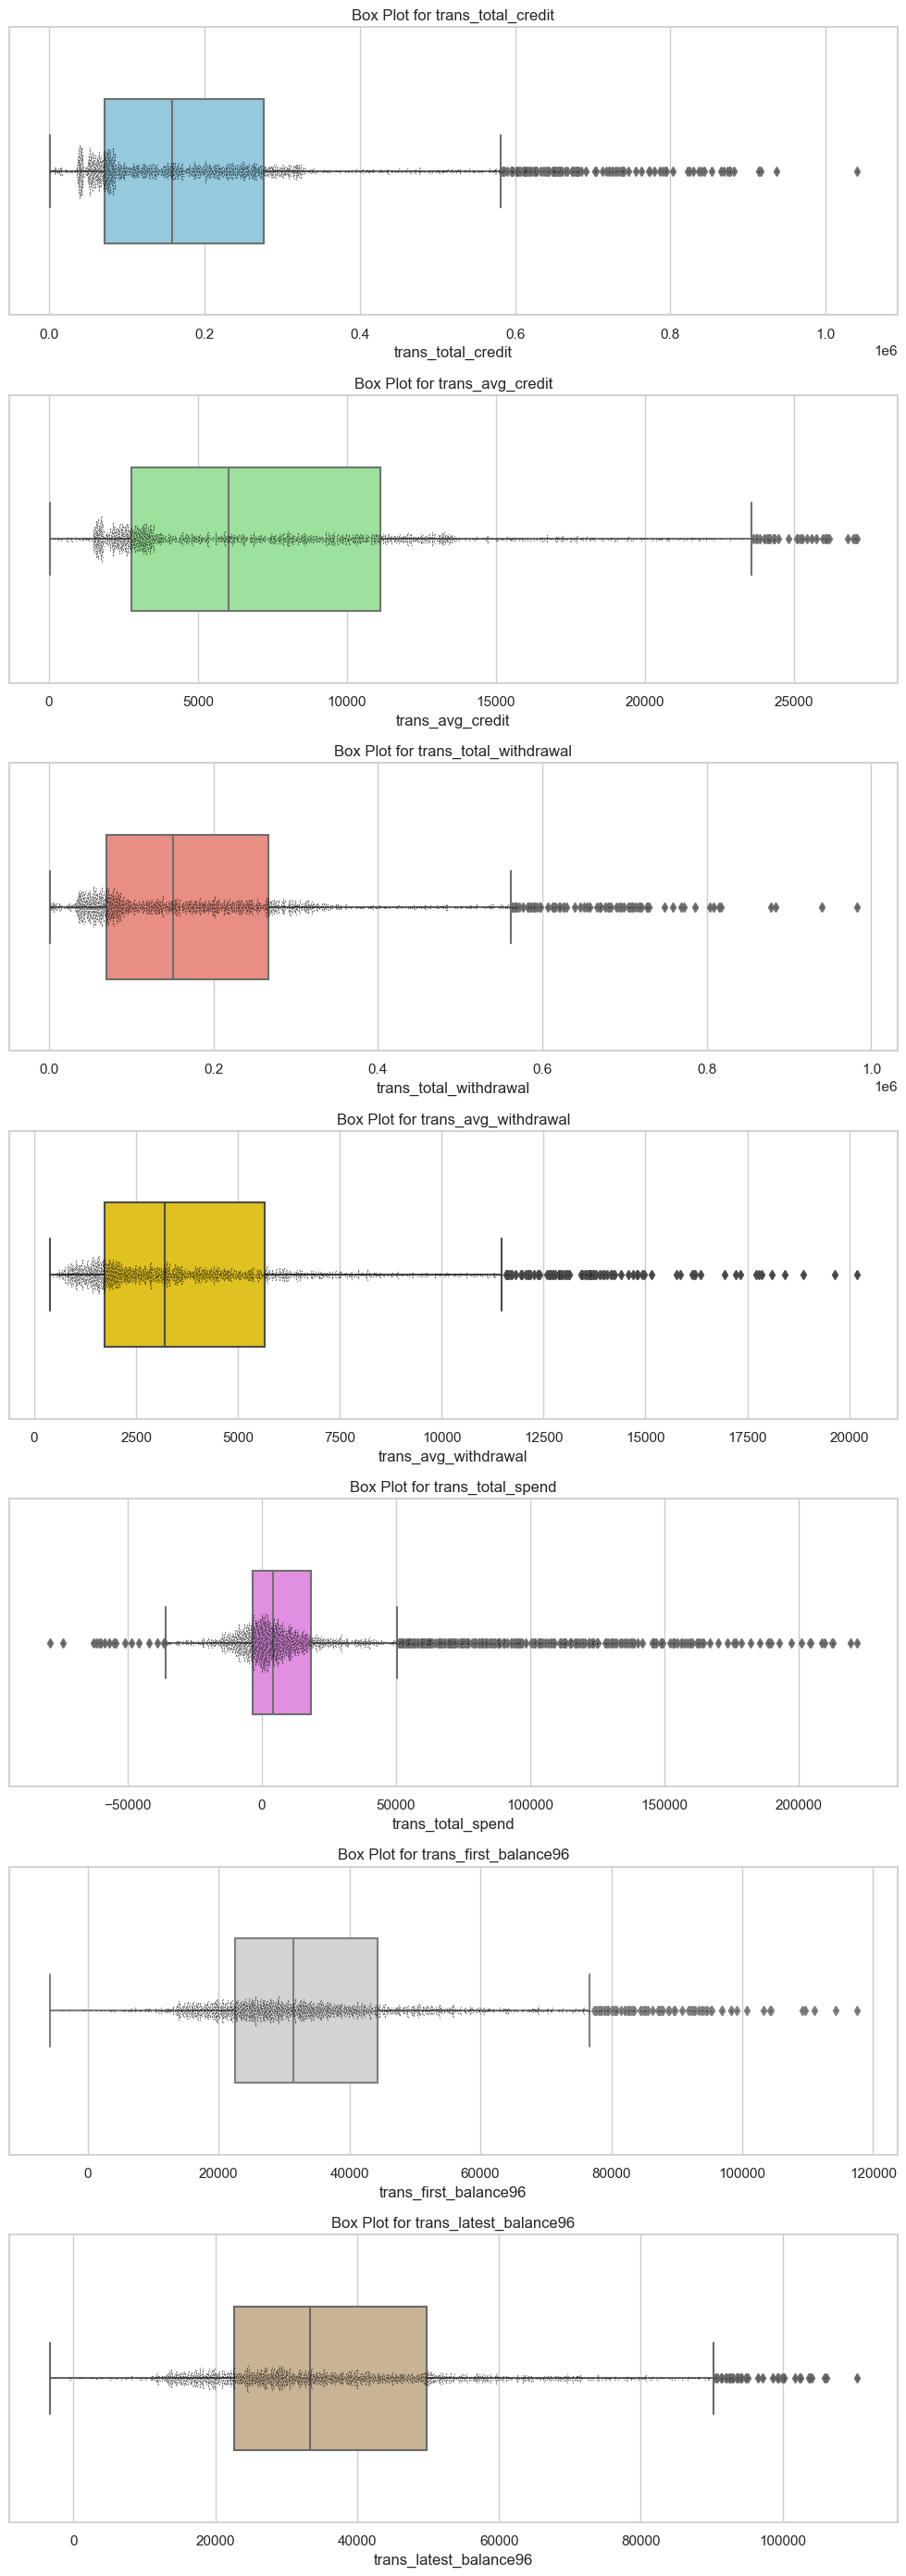

In [636]:
#Plotting the numeric variables related to trasnactions table 

plt.figure(figsize=(10, 28))  

# Set a style for the plots
sns.set(style="whitegrid")

# Define colors for each plot
colors = ["skyblue", "lightgreen", "salmon", "gold", "violet", "lightgrey", "tan"]

# Titles for each plot
titles = [
    'trans_total_credit', 'trans_avg_credit', 'trans_total_withdrawal', 
    'trans_avg_withdrawal', 'trans_total_spend', 'trans_first_balance96', 
    'trans_latest_balance96'
]

# Columns to plot
columns = [
    BaseTable['trans_total_credit'], BaseTable['trans_avg_credit'], BaseTable['trans_total_withdrawal'], 
    BaseTable['trans_avg_withdrawal'], BaseTable['trans_total_spend'], BaseTable['trans_first_balance96'], 
    BaseTable['trans_latest_balance96']
]

# Creating each subplot with additional features
for i in range(7):
    plt.subplot(7, 1, i+1)  # 7 rows, 1 column, i-th plot
    sns.boxplot(x=columns[i], color=colors[i], width=0.5, fliersize=5, whis=1.5)
    sns.swarmplot(x=columns[i], color='black', size=1, alpha=0.5)  # Swarm plot for data points
    plt.title(f'Box Plot for {titles[i]}')
    plt.xlabel(titles[i])

plt.tight_layout() 
plt.show()


In [637]:

# List of columns to treat outliers
columns_to_treat = [
    'trans_total_credit', 'trans_avg_credit', 'trans_total_withdrawal', 
    'trans_avg_withdrawal', 'trans_total_spend', 'trans_first_balance96', 
    'trans_latest_balance96'
]

for column_name in columns_to_treat:
    # Calculate the lower and upper boundaries based on +/- 3*sd
    lower = BaseTable[column_name].mean() - 3 * BaseTable[column_name].std()
    upper = BaseTable[column_name].mean() + 3 * BaseTable[column_name].std()

    # Count the number of outliers
    cnt_outlier = sum((BaseTable[column_name] < lower) | (BaseTable[column_name] > upper))

    if cnt_outlier > 0:
        # Replace outliers < lower boundary with the lower boundary
        BaseTable.loc[BaseTable[column_name] < lower, column_name] = lower

        # Replace outliers > upper boundary with the upper boundary
        BaseTable.loc[BaseTable[column_name] > upper, column_name] = upper


In [638]:
# List of columns for which to generate descriptive statistics
columns_to_describe = [
    'trans_total_credit', 'trans_avg_credit', 'trans_total_withdrawal', 
    'trans_avg_withdrawal', 'trans_total_spend', 'trans_first_balance96', 
    'trans_latest_balance96'
]

# Loop through each column and print descriptive statistics
for column_name in columns_to_describe:
    print(f"Descriptive Statistics for {column_name}:\n")
    print(BaseTable[column_name].describe(), "\n")


Descriptive Statistics for trans_total_credit:

count      2238.000000
mean     202867.921824
std      167978.206905
min         295.600000
25%       71619.200000
50%      158249.100000
75%      275707.400000
max      724763.566923
Name: trans_total_credit, dtype: float64 

Descriptive Statistics for trans_avg_credit:

count     2238.000000
mean      7493.904259
std       5591.828573
min         24.633333
25%       2759.078686
50%       6021.788426
75%      11109.640958
max      24411.431571
Name: trans_avg_credit, dtype: float64 

Descriptive Statistics for trans_total_withdrawal:

count      2239.000000
mean     187199.492480
std      147093.287966
min         900.000000
25%       69639.200000
50%      150442.800000
75%      266867.200000
max      647726.527700
Name: trans_total_withdrawal, dtype: float64 

Descriptive Statistics for trans_avg_withdrawal:

count     2239.000000
mean      4111.748400
std       3087.733215
min        375.714286
25%       1730.496157
50%       3197.8000

In [639]:
#create a function that checks for issing values in the BaseTable 
def check_missing_values(dataframe):
    """
    Check and display missing values in each column of a DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to check for missing values.

    Returns:
    pd.DataFrame: A DataFrame displaying the column names and the count of missing values.
    """
    missing_values = dataframe.isnull().sum()
    missing_df = pd.DataFrame({'Column Name': dataframe.columns, 'Missing Values': missing_values})
    missing_df = missing_df[missing_df['Missing Values'] > 0]
    return missing_df

# call function 
missing_data_summary = check_missing_values(BaseTable)
missing_data_summary

,Column Name,Missing Values
loan_id,loan_id,1944
loan_total_amount,loan_total_amount,1944
loan_duration,loan_duration,1944
loan_monthly_payments,loan_monthly_payments,1944
loan_status,loan_status,1944
loan_granted_date_y,loan_granted_date_y,1913
loan_granted_97,loan_granted_97,1913
order_LEASING,order_LEASING,380
order_NOT_AVAILABLE,order_NOT_AVAILABLE,380
order_POJISTNE,order_POJISTNE,380


In [640]:
# Fill in the missing values 

# create adefault date and use the datetime format to replace missing dates in the columns that have dates 
default_date = pd.to_datetime('1900-12-12').date()

BaseTable["loan_id"]                   = BaseTable["loan_id"].fillna(0)
BaseTable["loan_total_amount"]         = BaseTable["loan_total_amount"].fillna(0)
BaseTable["loan_duration"]             = BaseTable["loan_duration"].fillna(0)
BaseTable["loan_monthly_payments"]     = BaseTable["loan_monthly_payments"].fillna(0)
BaseTable["loan_status"]               = BaseTable["loan_status"].fillna("No_loan")
BaseTable["loan_granted_date_y"]       = BaseTable["loan_granted_date_y"].fillna(default_date)
BaseTable["loan_granted_97"]           = BaseTable["loan_granted_97"].fillna(0)

BaseTable["order_LEASING"]             = BaseTable["order_LEASING"].fillna(0) 
BaseTable["order_NOT_AVAILABLE"]       = BaseTable["order_NOT_AVAILABLE"].fillna(0)
BaseTable["order_POJISTNE"]            = BaseTable["order_POJISTNE"].fillna(0)
BaseTable["order_SIPO"]                = BaseTable["order_SIPO"].fillna(0)
BaseTable["order_UVER"]                = BaseTable["order_UVER"].fillna(0)
BaseTable["order_k_symbol_SUM"]        = BaseTable["order_k_symbol_SUM"].fillna(0)
BaseTable["order_AB"]                  = BaseTable["order_AB"].fillna(0)
BaseTable["order_CD"]                  = BaseTable["order_CD"].fillna(0)
BaseTable["order_EF"]                  = BaseTable["order_EF"].fillna(0)
BaseTable["order_GH"]                  = BaseTable["order_GH"].fillna(0)
BaseTable["order_IJ"]                  = BaseTable["order_IJ"].fillna(0)
BaseTable["order_KL"]                  = BaseTable["order_KL"].fillna(0)
BaseTable["order_MN"]                  = BaseTable["order_MN"].fillna(0)
BaseTable["order_OP"]                  = BaseTable["order_OP"].fillna(0)
BaseTable["order_QR"]                  = BaseTable["order_QR"].fillna(0)
BaseTable["order_ST"]                  = BaseTable["order_ST"].fillna(0)
BaseTable["order_UV"]                  = BaseTable["order_UV"].fillna(0)
BaseTable["order_WX"]                  = BaseTable["order_WX"].fillna(0)
BaseTable["order_YZ"]                  = BaseTable["order_YZ"].fillna(0)


BaseTable["trans_total_credit"]       = BaseTable["trans_total_credit"].fillna(BaseTable["trans_total_credit"].mean())
BaseTable["trans_avg_credit"]         = BaseTable["trans_avg_credit"].fillna(BaseTable["trans_avg_credit"].mean())
BaseTable["trans_total_spend"]        = BaseTable["trans_total_spend"].fillna(BaseTable["trans_total_spend"].mean())

BaseTable["card_id"]                  = BaseTable["card_id"].fillna(0)
BaseTable["card_type"]                = BaseTable["card_type"].fillna("No_Card")
BaseTable["card_issued_date"]         = BaseTable["card_issued_date"].fillna(default_date)
BaseTable["card_issued_year"]         = BaseTable["card_issued_year"].fillna(0)
BaseTable["card_issued_month"]        = BaseTable["card_issued_month"].fillna(0)
BaseTable["card_issued_month"]        = BaseTable["card_issued_month"].fillna(0)
BaseTable["card_issued_day"]          = BaseTable["card_issued_day"].fillna(0)
BaseTable["credit_card_issued97"]     = BaseTable["credit_card_issued97"].fillna(0)



In [641]:
BaseTable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 651 to 2148
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   account_id                2239 non-null   int64         
 1   district_id_x             2239 non-null   int64         
 2   account_freq_statement    2239 non-null   object        
 3   account_year              2239 non-null   int32         
 4   account_month             2239 non-null   object        
 5   account_day               2239 non-null   object        
 6   account_creation_date     2239 non-null   datetime64[ns]
 7   account_LOR               2239 non-null   int32         
 8   loan_id                   2239 non-null   float64       
 9   loan_total_amount         2239 non-null   float64       
 10  loan_duration             2239 non-null   float64       
 11  loan_monthly_payments     2239 non-null   float64       
 12  loan_status            

In [642]:
# Changing the datatypes of the columns 

# Convert 'account_month' and 'account_day' columns to integers
BaseTable['account_month'] = BaseTable['account_month'].astype(int)
BaseTable['account_day'] = BaseTable['account_day'].astype(int)

# Convert 'loan_id', 'loan_duration', 'loan_granted_97' to integers
BaseTable['loan_id'] = BaseTable['loan_id'].astype(int)
BaseTable['loan_duration'] = BaseTable['loan_duration'].astype(int)
BaseTable['loan_granted_97'] = BaseTable['loan_granted_97'].astype(int)

# Convert 'card_id', 'card_issued_year', 'card_issued_month', 'card_issued_day', 'credit_card_issued97' to integers
BaseTable['card_id'] = BaseTable['card_id'].astype(int)
BaseTable['card_issued_year'] = BaseTable['card_issued_year'].astype(int)
BaseTable['card_issued_month'] = BaseTable['card_issued_month'].astype(int)
BaseTable['card_issued_day'] = BaseTable['card_issued_day'].astype(int)
BaseTable['credit_card_issued97'] = BaseTable['credit_card_issued97'].astype(int)



In [643]:
#Rename 'loan_granted_date_y' and 'district_id_x'
BaseTable.rename(columns={'loan_granted_date_y': 'loan_granted_date',
                          'district_id_x': 'district_id'}, inplace=True)


In [644]:
BaseTable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 651 to 2148
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   account_id                2239 non-null   int64         
 1   district_id               2239 non-null   int64         
 2   account_freq_statement    2239 non-null   object        
 3   account_year              2239 non-null   int32         
 4   account_month             2239 non-null   int32         
 5   account_day               2239 non-null   int32         
 6   account_creation_date     2239 non-null   datetime64[ns]
 7   account_LOR               2239 non-null   int32         
 8   loan_id                   2239 non-null   int32         
 9   loan_total_amount         2239 non-null   float64       
 10  loan_duration             2239 non-null   int32         
 11  loan_monthly_payments     2239 non-null   float64       
 12  loan_status            

In [645]:
BaseTable 

,account_id,district_id,account_freq_statement,account_year,account_month,account_day,account_creation_date,account_LOR,loan_id,loan_total_amount,...,client_gender,client_age,client_age_group,card_id,card_type,card_issued_date,card_issued_year,card_issued_month,card_issued_day,credit_card_issued97
651,1,18,POPLATEK MESICNE,1995,3,24,1995-03-24,1,0,0.0,...,F,26,20,0,No_Card,1900-12-12,0,0,0,0
22,2,1,POPLATEK MESICNE,1993,2,26,1993-02-26,3,4959,80952.0,...,M,51,50,0,No_Card,1900-12-12,0,0,0,0
1407,6,51,POPLATEK MESICNE,1994,9,27,1994-09-27,2,0,0.0,...,F,58,50,0,No_Card,1900-12-12,0,0,0,0
1594,8,57,POPLATEK MESICNE,1995,9,21,1995-09-21,1,0,0.0,...,M,53,50,0,No_Card,1900-12-12,0,0,0,0
1916,9,70,POPLATEK MESICNE,1993,1,27,1993-01-27,3,0,0.0,...,M,15,10,0,No_Card,1900-12-12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,11333,8,POPLATEK MESICNE,1994,5,26,1994-05-26,2,0,0.0,...,M,54,50,0,No_Card,1900-12-12,0,0,0,0
234,11349,1,POPLATEK TYDNE,1995,5,26,1995-05-26,1,7304,419880.0,...,F,51,50,0,No_Card,1900-12-12,0,0,0,0
1683,11359,61,POPLATEK MESICNE,1994,10,1,1994-10-01,2,7305,54024.0,...,M,28,20,1247,classic,1995-06-13,1995,6,13,0
1856,11362,67,POPLATEK MESICNE,1995,10,14,1995-10-14,1,7308,129408.0,...,F,34,30,0,No_Card,1900-12-12,0,0,0,0


In [646]:
#Exporting the BaseTable
BaseTable.to_csv (directory + "/BaseTable.csv", index = False, header=True)

# Visualization of the variables 

## Independent variables

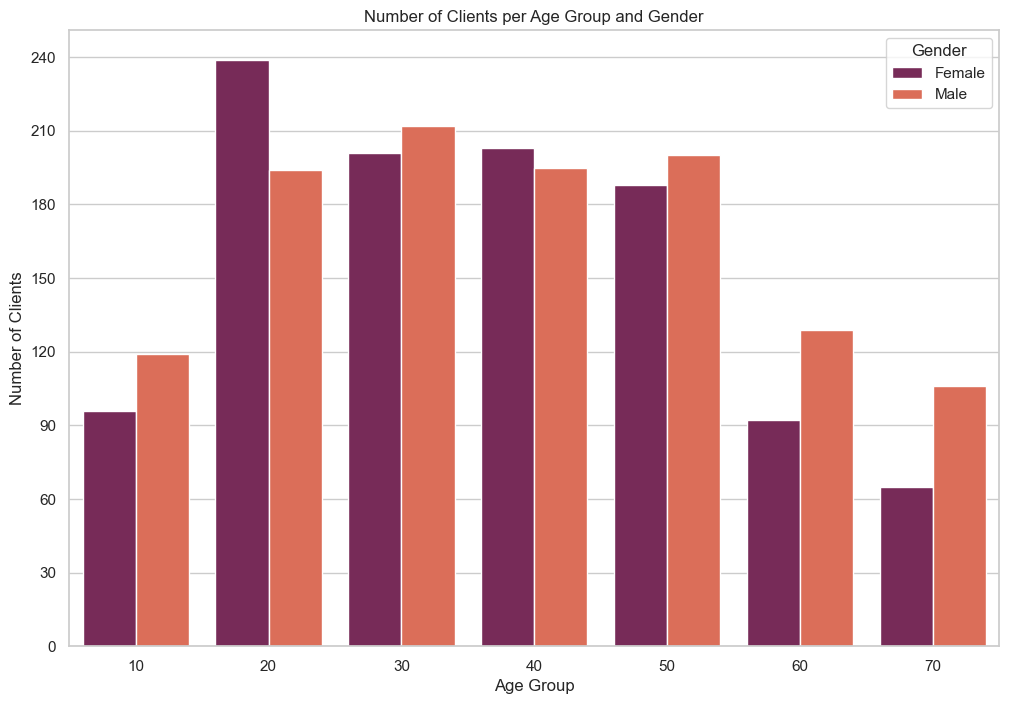

In [647]:
#countplot for number of clients per age group and gender

plt.figure(figsize=(12, 8))
sns.countplot(x='client_age_group', hue='client_gender', data=BaseTable, palette='rocket')
plt.title('Number of Clients per Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Clients')
legend_labels = ['Female', 'Male']
plt.legend(legend_labels, title='Gender')

ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(ticks=plt.xticks()[0], labels=[int(float(label.get_text())) for label in ax.get_xticklabels()])

 
plt.show()

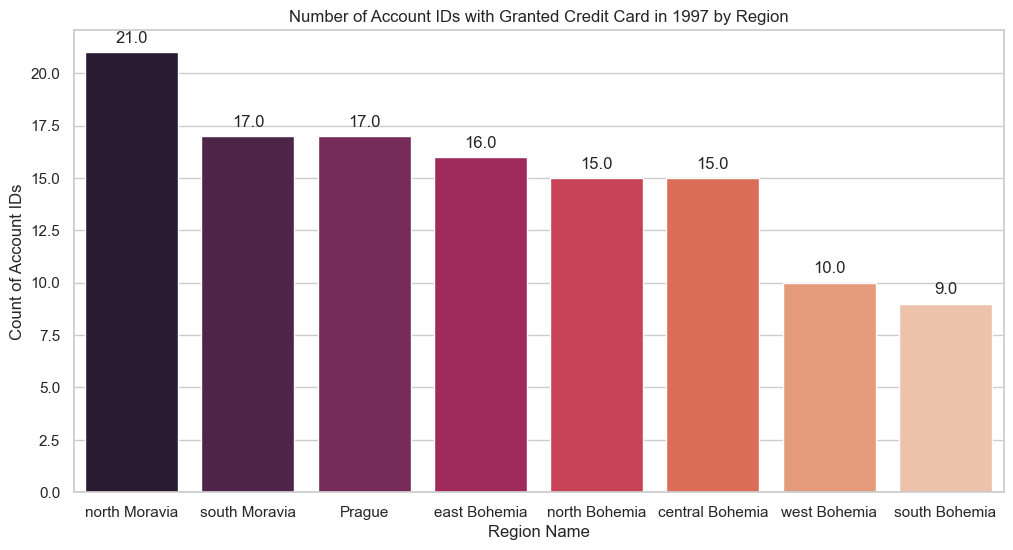

In [648]:
#Plotting the Number of Account IDs with Granted Credit Card in 1997 by Region
plt.figure(figsize=(12, 6))
 
# Filter the DataFrame for rows where 'credit_card_issued97' is 1
filtered_data = BaseTable[BaseTable['credit_card_issued97'] == 1.0]
 
# Count the occurrences for each 'region_name'
count_data = filtered_data['region_name'].value_counts().reset_index(name='count')
 
# Bar plot for count of 'account_id' by 'region_name'
ax = sns.barplot(x='region_name', y='count', data=count_data, palette='rocket')
 
# Display count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 


plt.title('Number of Account IDs with Granted Credit Card in 1997 by Region')
plt.xlabel('Region Name')
plt.ylabel('Count of Account IDs')
 
plt.show()

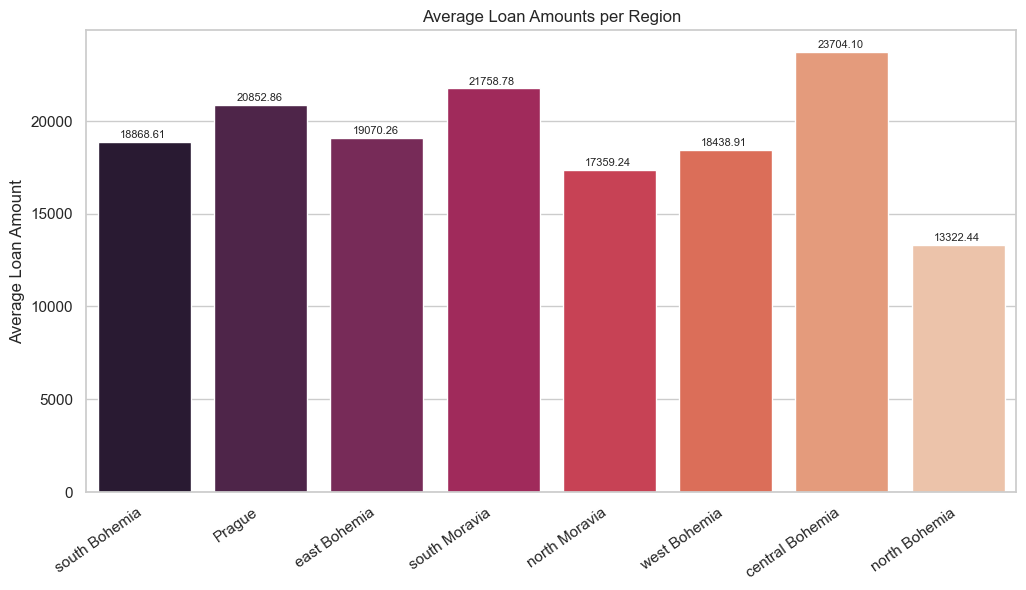

In [649]:
# Bar plot for average loan amount per region, with gradient color based on salary
plt.figure(figsize=(12, 6))

ax = sns.barplot(x='region_name', y='loan_total_amount', data=BaseTable, palette='rocket',errorbar=None)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(-1, 5), textcoords='offset points', fontsize=8)

plt.title('Average Loan Amounts per Region')
plt.xlabel('')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=35, ha='right')

plt.show()

In [650]:
#Plottingthe the first balance of the year 1996 and the date of account creation 

BaseTable['account_creation_date'] = pd.to_datetime(BaseTable['account_creation_date'])

# Sorting data by account_creation_date for better plotting
BaseTable = BaseTable.sort_values(by='account_creation_date')

# Creating the interactive line chart
fig = px.line(BaseTable, x='account_creation_date', y='trans_first_balance96', title='First Balance in 1996')

fig.update_xaxes(
    title_text='Account Creation Date',
    tickangle=45
)
fig.update_yaxes(title_text=' Amount of First Blance $  ')

fig.show()


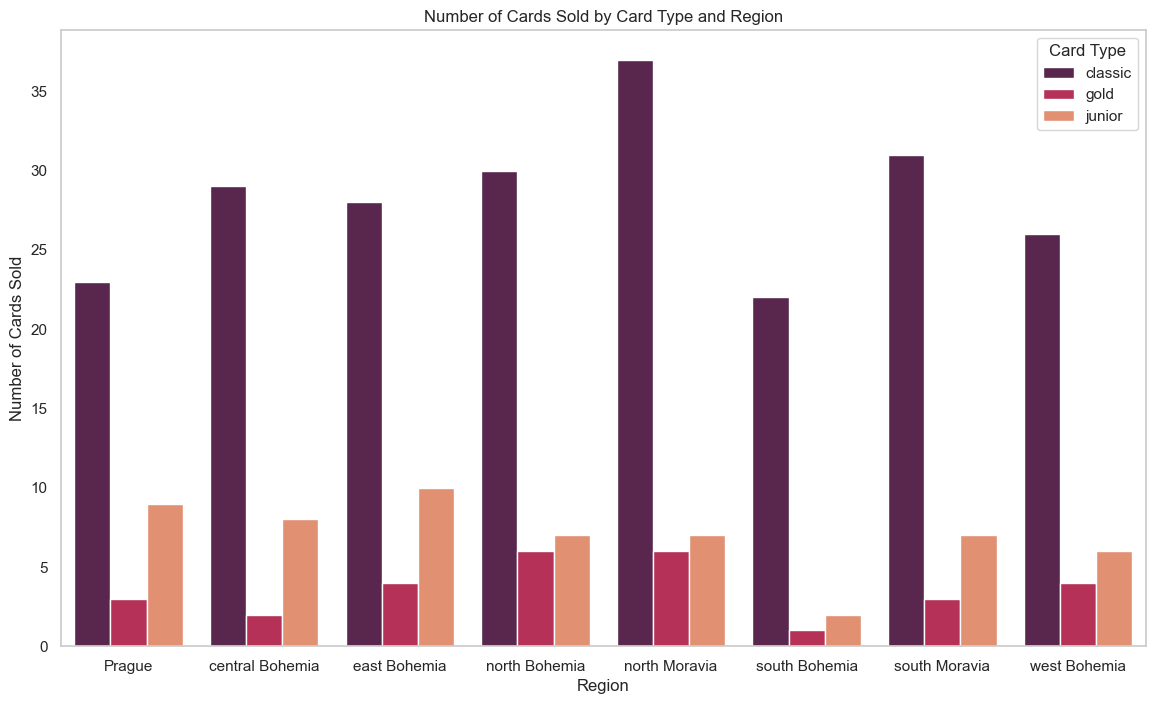

In [651]:
plt.figure(figsize=(14, 8))
 
# Group by 'type' and 'region_name', and count the number of cards sold
cards_sold = BaseTable.groupby(['card_type', 'region_name']).size().reset_index(name='count')
 
# Remove rows where card type is 'no_card'
cards_sold = cards_sold[cards_sold['card_type'] != 'No_Card']
 
# Create a bar plot
sns.barplot(x='region_name', y='count', hue='card_type', data=cards_sold, palette='rocket')
 
# Remove grid lines
plt.grid(False)
 
# Set labels and title
plt.title('Number of Cards Sold by Card Type and Region')
plt.xlabel('Region')
plt.ylabel('Number of Cards Sold')
 
# Display legend
plt.legend(title='Card Type')
 
plt.show()

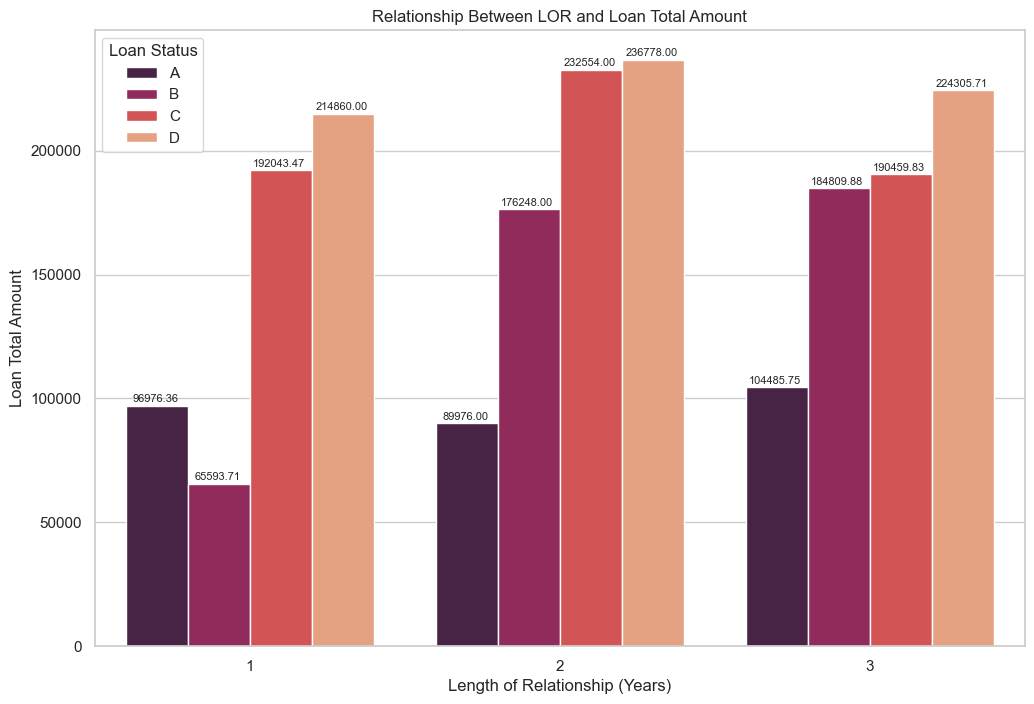

In [652]:
# Barplot for the LOR and loan total amount

hue_order1 = ['A', 'B', 'C', 'D']
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='account_LOR', y='loan_total_amount', data=BaseTable, hue='loan_status', palette='rocket',errorbar=None, hue_order = hue_order1)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(-1, 5), textcoords='offset points', fontsize=8)
plt.title('Relationship Between LOR and Loan Total Amount')
plt.xlabel('Length of Relationship (Years)')
plt.ylabel('Loan Total Amount')
plt.legend(title='Loan Status')
                 
plt.show()

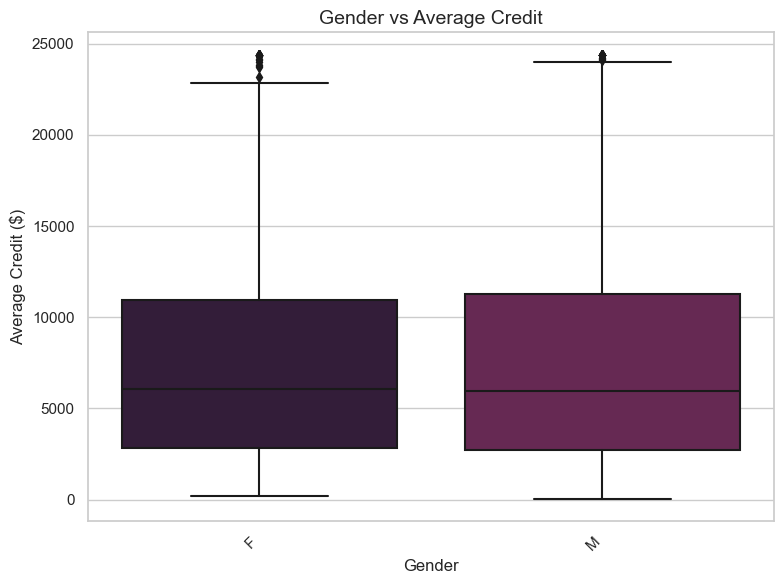

In [653]:
#Simple visulaization to compare between Gender and Average Credit

sns.set(style="whitegrid")

# Creating a color palette for the plot
palette = sns.color_palette("rocket")

# Creating the 'Gender vs Average Credit' plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='client_gender', y='trans_avg_credit', data=BaseTable, palette=palette)
plt.title('Gender vs Average Credit', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Credit ($)', fontsize=12)

# Customizing x-tick labels
plt.xticks(rotation=45, horizontalalignment='right')

# Show the plot
plt.tight_layout()
plt.show()


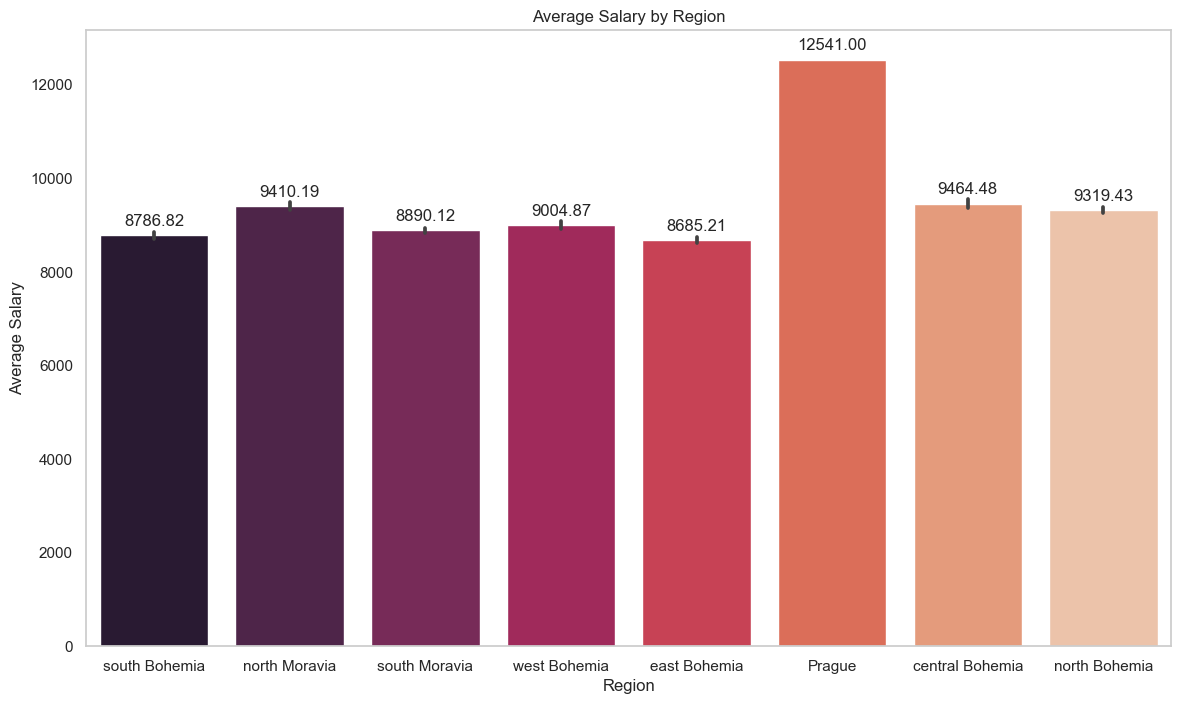

In [654]:
#Plotting the average salary per region 

plt.figure(figsize=(14, 8))

# Bar plot with 'region_name' on the x-axis, 'avg_salary' on the y-axis
ax = sns.barplot(x='region_name', y='avg_salary', data=BaseTable, palette='rocket')

# Remove grid lines
ax.grid(False)

# Display average salary on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average Salary by Region')
plt.xlabel('Region')
plt.ylabel('Average Salary')

plt.show()

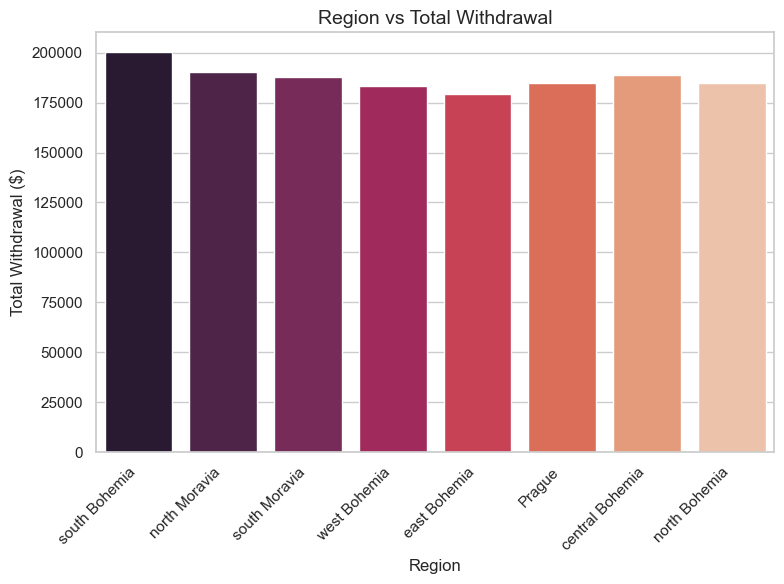

In [655]:
# Setting a style for the plot
sns.set(style="whitegrid")

# Creating the 'Region vs Total Withdrawal' plot
plt.figure(figsize=(8, 6))
sns.barplot(x='region_name', y='trans_total_withdrawal', data=BaseTable, palette="rocket", errorbar=None)
plt.title('Region vs Total Withdrawal', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Withdrawal ($)', fontsize=12)

# Customizing x-tick labels
plt.xticks(rotation=45, horizontalalignment='right')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Source\AppData\Local\Temp\ipykernel_31124\2527784776.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



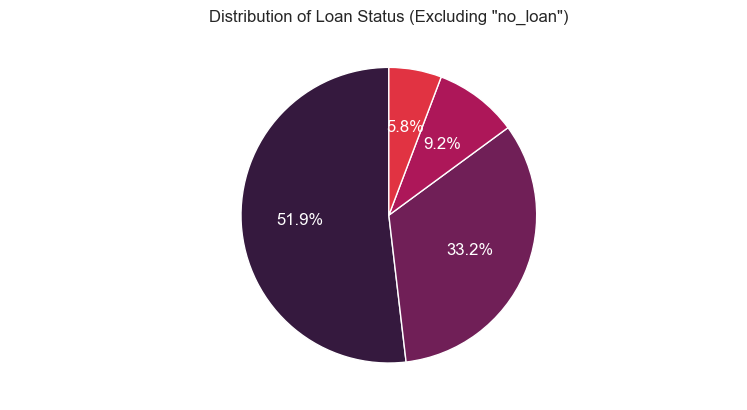

In [656]:
#
filtered_data = BaseTable[BaseTable['loan_status'] != 'No_loan']

# Map the values in the 'loan_status' column
status_mapping = {
    'A': 'Contract Finished, No Problems',
    'B': 'Contract Finished, Loan Not Paid',
    'C': 'Running Contract, OK So Far',
    'D': 'Running Contract, Client in Debt'
}

filtered_data['loan_status'] = filtered_data['loan_status'].replace(status_mapping)

# Get the updated loan status counts
loan_status_counts = filtered_data['loan_status'].value_counts()

# Create a pie chart with the 'rocket' colormap
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct=lambda p: '{:.1f}%'.format(p), startangle=90, colors=sns.color_palette('rocket'), textprops={'color': 'white'})

# Set title
plt.title('Distribution of Loan Status (Excluding "no_loan")')

# Display the pie chart
plt.show()


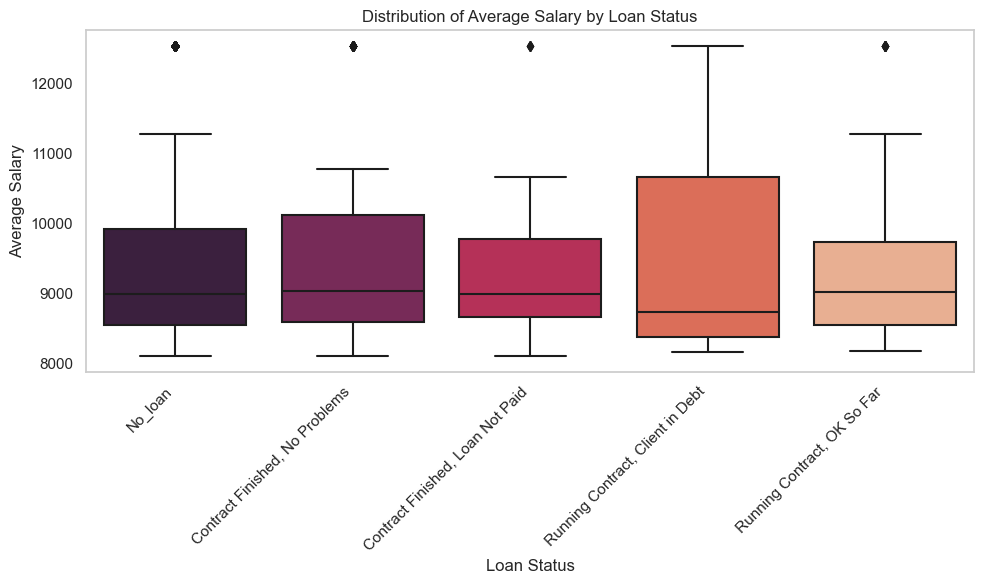

In [657]:
plt.figure(figsize=(10, 6))

# Map the values in the 'loan_status' column
status_mapping = {
    'A': 'Contract Finished, No Problems',
    'B': 'Contract Finished, Loan Not Paid',
    'C': 'Running Contract, OK So Far',
    'D': 'Running Contract, Client in Debt'
}

BaseTable['loan_status_mapped'] = BaseTable['loan_status'].replace(status_mapping)

# Boxplot for the distribution of average salary by loan status
ax = sns.boxplot(x='loan_status_mapped', y='avg_salary', data=BaseTable, palette='rocket')

# Remove grid lines
ax.grid(False)

# Set labels and title
plt.title('Distribution of Average Salary by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Salary')

# Rotate x-axis labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


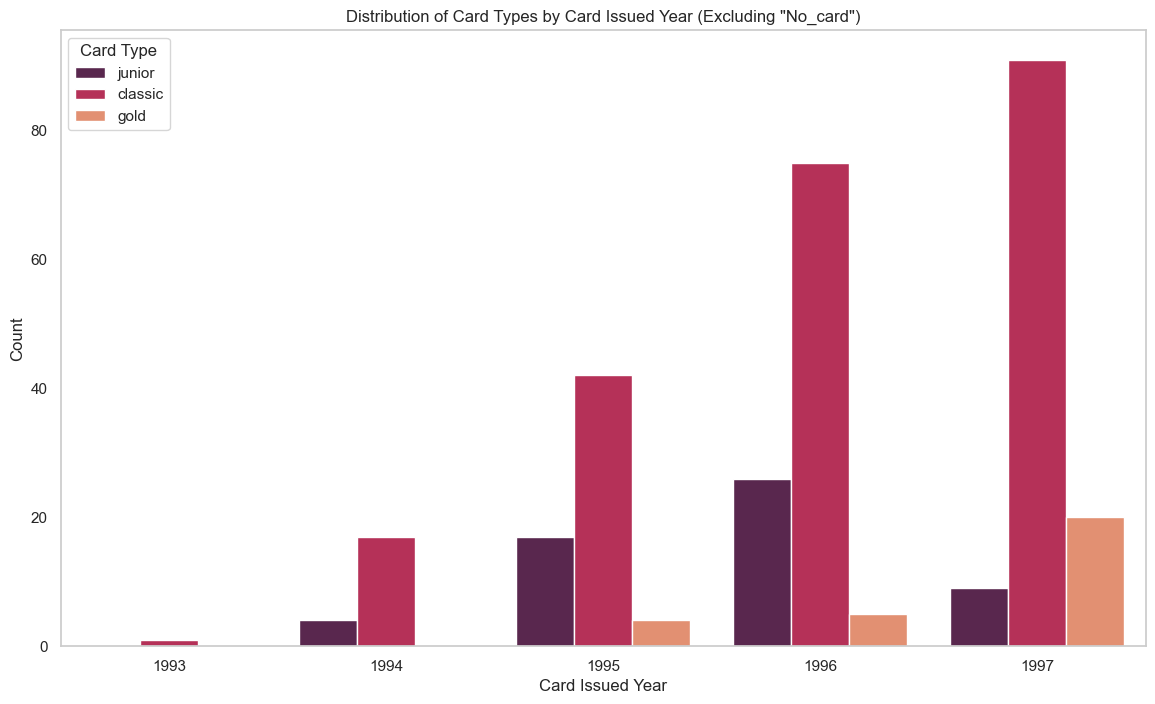

In [658]:
plt.figure(figsize=(14, 8))

# Filter out rows where 'card_type' is 'No_card'
filtered_data = BaseTable[BaseTable['card_type'] != 'No_Card']

# Count plot with 'card_issued_year' on the x-axis, hue='card_type' for different card types
sns.countplot(x='card_issued_year', hue='card_type', data=filtered_data, palette='rocket')

# Remove grid lines
plt.grid(False)

# Set labels and title
plt.title('Distribution of Card Types by Card Issued Year (Excluding "No_card")')
plt.xlabel('Card Issued Year')
plt.ylabel('Count')

# Display legend
plt.legend(title='Card Type')

plt.show()


# Dependent variables 

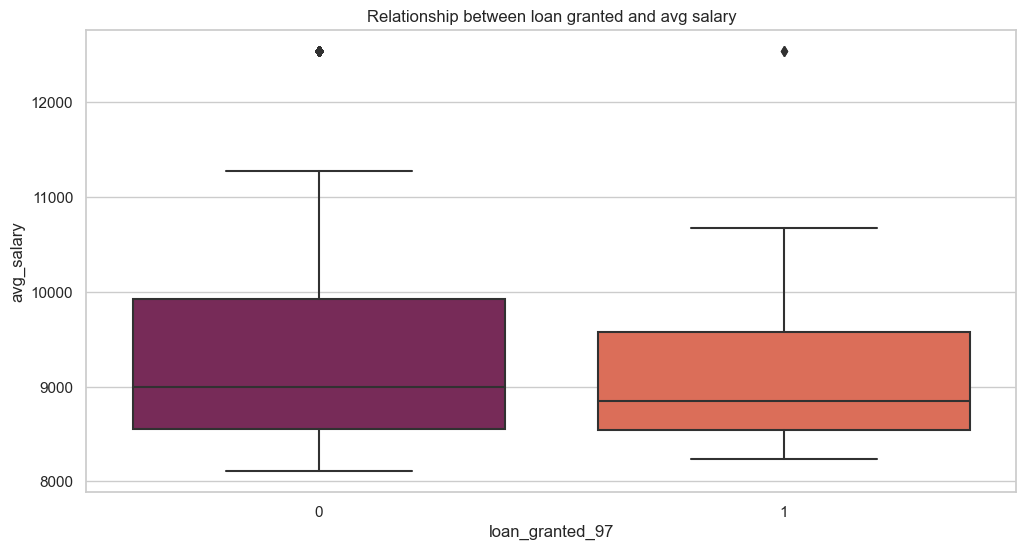

In [659]:
#Relationship between credit card and average salary 
plt.figure(figsize=(12, 6))

# Using the "rocket" palette
sns.boxplot(x='loan_granted_97', y='avg_salary', data=BaseTable, palette="rocket")

plt.title('Relationship between loan granted and avg salary')
plt.show()


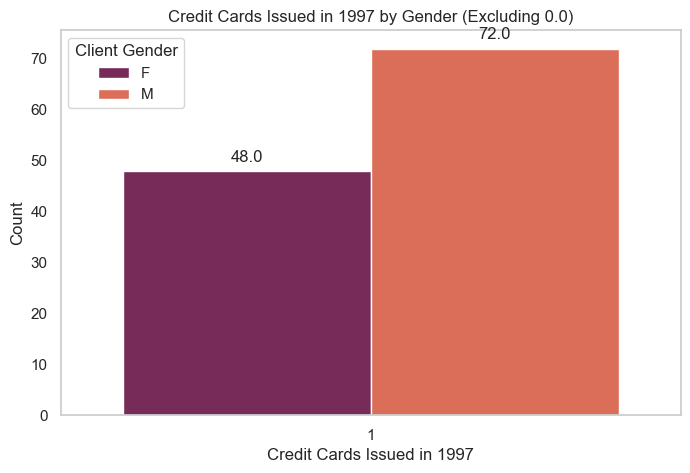

In [660]:
#ploting Credit Cards Issued in 1997 by Gender (Excluding 0.0)

plt.figure(figsize=(8, 5))

# Filter rows where 'credit_card_issued97' is 1.0
filtered_data = BaseTable[BaseTable['credit_card_issued97'] == 1.0]

# Count the occurrences of each combination for the filtered data
count_data = filtered_data.groupby(['credit_card_issued97', 'client_gender']).size().reset_index(name='count')

# Bar plot with actual count values on top of the bars
ax = sns.barplot(x='credit_card_issued97', y='count', hue='client_gender', data=count_data, palette='rocket')

# Display count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Remove gridlines
ax.grid(False)

# Set labels and title
plt.title('Credit Cards Issued in 1997 by Gender (Excluding 0.0)')
plt.xlabel('Credit Cards Issued in 1997')
plt.ylabel('Count')

# Display legend
plt.legend(title='Client Gender')

plt.show()


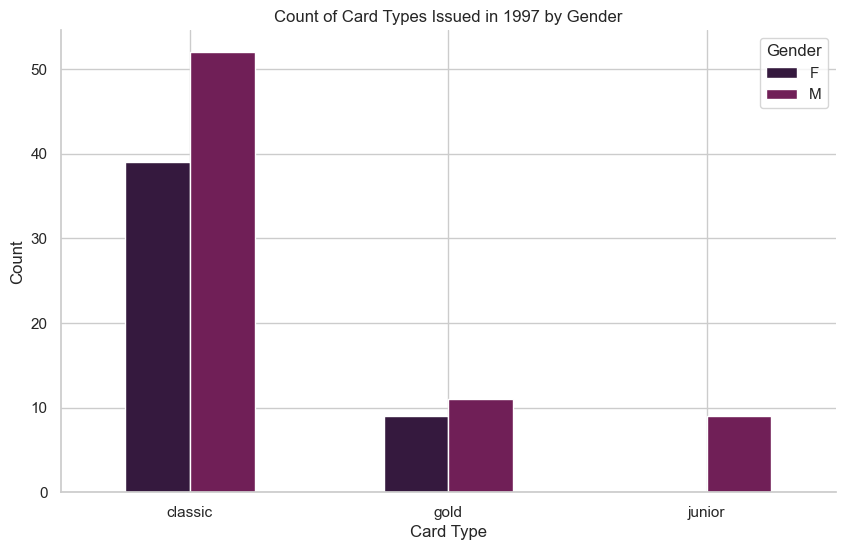

In [661]:
#Plotting the count of Count of Card Types Issued in 1997 by Gender

# Using Seaborn's rocket palette for better visual appeal
sns.set_palette("rocket")

# Creating the bar plot
ax = grouped_data.plot(kind='bar', figsize=(10, 6), title='Count of Card Types Issued in 1997 by Gender', ylabel='Count', rot=0)

# Adding labels and legend
ax.set_xlabel('Card Type')
ax.legend(title='Gender')

sns.despine()

plt.show()



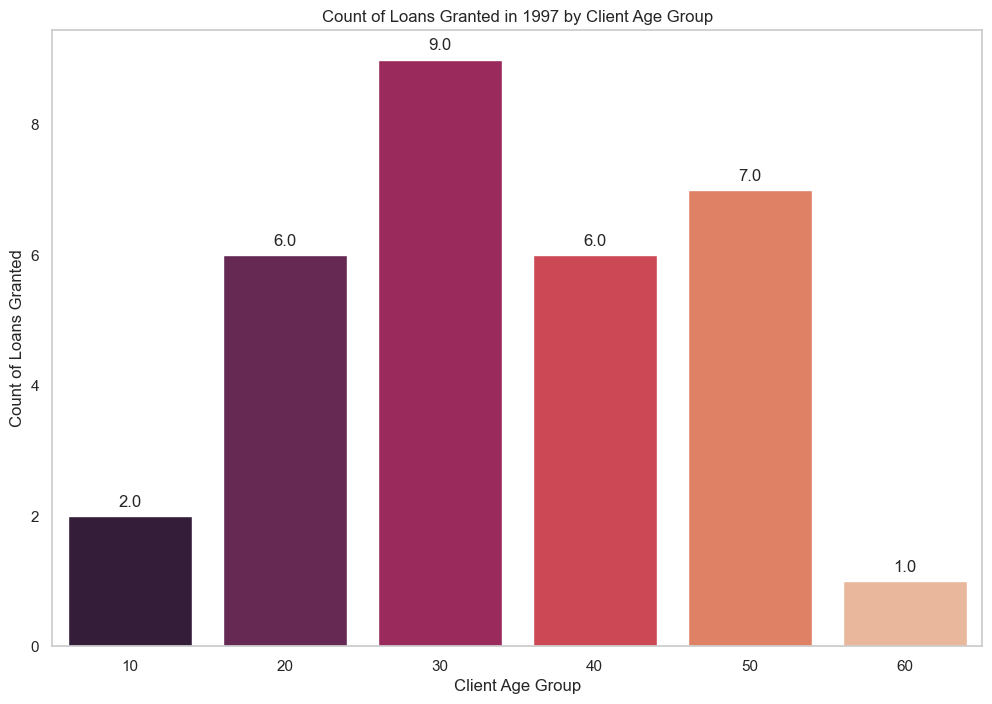

In [662]:
#Visulaization of Count of Loans Granted in 1997 by Client Age Group

plt.figure(figsize=(12, 8))

# Filter the DataFrame for rows where 'loan_granted_97' is 1
loan_granted_data = BaseTable[BaseTable['loan_granted_97'] == 1].copy()

# Count the occurrences for each 'client_age_group'
count_data = loan_granted_data['client_age_group'].value_counts().reset_index(name='count')

# Bar plot
ax = sns.countplot(x='client_age_group', data=loan_granted_data, palette='rocket')

# Remove gridlines
ax.grid(False)

# Display count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Count of Loans Granted in 1997 by Client Age Group')
plt.xlabel('Client Age Group')
plt.ylabel('Count of Loans Granted')

plt.show()


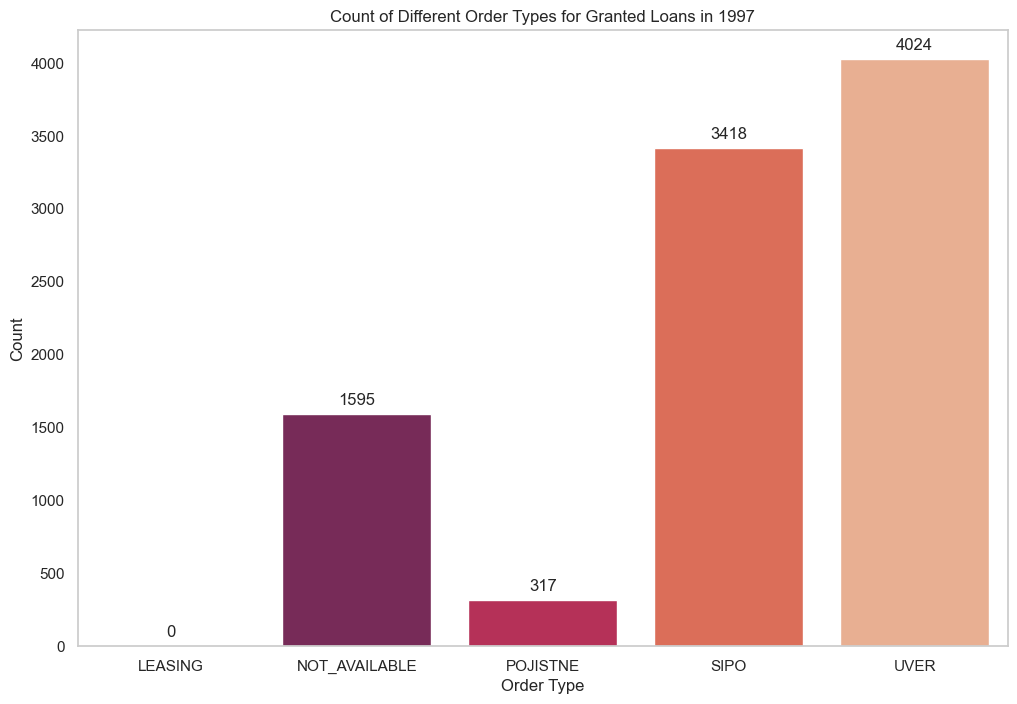

In [663]:
# visualization Count of Different Order Types for Granted Loans in 1997


order_columns = ['order_LEASING', 'order_NOT_AVAILABLE', 'order_POJISTNE', 'order_SIPO', 'order_UVER']

# Melt the DataFrame to long format for easier plotting
melted_data = BaseTable.melt(id_vars='loan_granted_97', value_vars=order_columns, var_name='order_type', value_name='count')

# Remove the 'order_' prefix from 'order_type'
melted_data['order_type'] = melted_data['order_type'].str.replace('order_', '')

# Filter the DataFrame for rows where 'loan_granted_97' is 1
filtered_data = melted_data[melted_data['loan_granted_97'] == 1]

# Create a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='order_type', y='count', data=filtered_data, palette='rocket', errorbar=None)

# Set labels and title
plt.title('Count of Different Order Types for Granted Loans in 1997')
plt.xlabel('Order Type')
plt.ylabel('Count')

# Remove grid lines
ax.grid(False)

# Display rounded count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


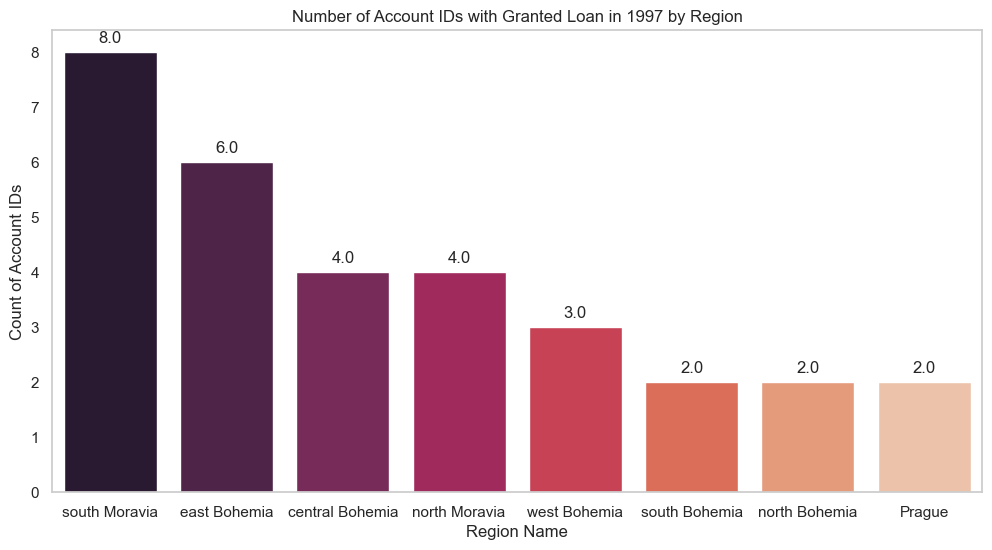

In [664]:
plt.figure(figsize=(12, 6))

# Filter the DataFrame for rows where 'loan_granted_97' is 1
filtered_data = BaseTable[BaseTable['loan_granted_97'] == 1.0]

# Count the occurrences for each 'region_name'
count_data = filtered_data['region_name'].value_counts().reset_index(name='count')

# Bar plot for count of 'account_id' by 'region_name'
ax = sns.barplot(x='region_name', y='count', data=count_data, palette='rocket')

# Remove grid lines
ax.grid(False)

# Display count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title('Number of Account IDs with Granted Loan in 1997 by Region')
plt.xlabel('Region Name')
plt.ylabel('Count of Account IDs')

plt.show()


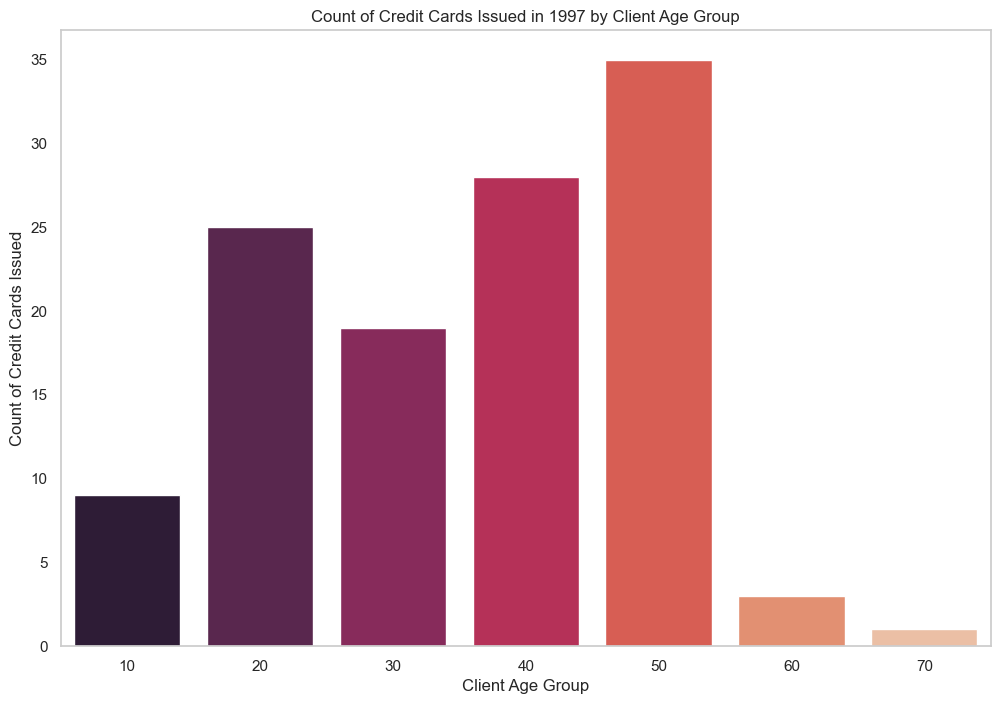

In [665]:
# Filter the DataFrame for rows where 'credit_card_issued97' is 1
credit_card_data = BaseTable[BaseTable['credit_card_issued97'] == 1].copy()

# Bar plot
plt.figure(figsize=(12, 8))

# Remove grid lines
plt.grid(False)

sns.countplot(x='client_age_group', data=credit_card_data, palette='rocket')
plt.title('Count of Credit Cards Issued in 1997 by Client Age Group')
plt.xlabel('Client Age Group')
plt.ylabel('Count of Credit Cards Issued')

plt.show()


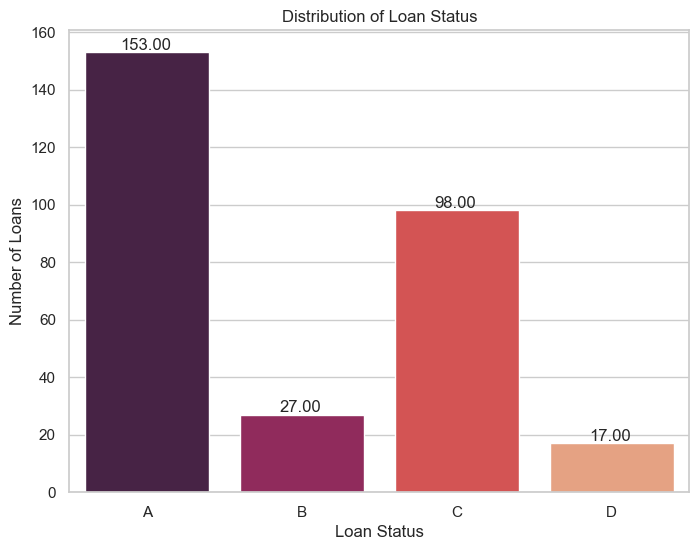

In [666]:
# Bar Chart for Loan Status
bar_order = ['A', 'B', 'C', 'D']

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='loan_status', data=BaseTable, order = bar_order, palette='rocket')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(-1, 5), textcoords='offset points', fontsize=12)


plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.show()